# MS Movie Studio Project Notebook

## Data Understanding

#### Import Pandas, Matplotlib, SQLite, Seaborn and Numpy

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### Connect to IMDB Database

In [2]:
conn = sqlite3.connect('zippedData/im.db')

#### Create IMDB tables listing for reference

In [3]:
imdb_tables = '''SELECT * FROM sqlite_master;'''

pd.read_sql_query(imdb_tables,conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


#### Storing Key IMDB Tables 

In [4]:
movie_basics = pd.read_sql_query(''' SELECT * FROM movie_basics''',conn)
movie_basics.to_csv()
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [5]:
movie_ratings = pd.read_sql_query(''' SELECT * FROM movie_ratings ''',conn)
movie_ratings.to_csv()
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [6]:
movie_akas = pd.read_sql_query(''' SELECT * FROM movie_akas''',conn)
movie_akas.to_csv()
movie_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [7]:
#Joining movie_ratings and movie_basics, and adding a column 'total_weight' as a measure of popularity

movies_agg = pd.read_sql_query('''
SELECT 
mr.movie_id
,mb.primary_title
,mb.original_title
,mb.genres
,mb.start_year
,averagerating
,numvotes
,(averagerating*numvotes) as total_weight

FROM movie_ratings mr
LEFT JOIN movie_basics mb
ON mr.movie_id = mb.movie_id

GROUP BY 1,2,3,4,5,6,7

ORDER BY total_weight DESC;

''',conn)

movies_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie_id        73856 non-null  object 
 1   primary_title   73856 non-null  object 
 2   original_title  73856 non-null  object 
 3   genres          73052 non-null  object 
 4   start_year      73856 non-null  int64  
 5   averagerating   73856 non-null  float64
 6   numvotes        73856 non-null  int64  
 7   total_weight    73856 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


#### Import movie budgets and gross sales data

In [8]:
movie_gross = pd.read_csv('./zippedData/bom.movie_gross.csv.gz')
movie_gross.to_csv()
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [9]:
movie_budget = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')
movie_budget.to_csv()
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


#### Import additional tables (to be used if needed)

In [10]:
tmdb_data = pd.read_csv('./zippedData/tmdb.movies.csv.gz')
tmdb_data.to_csv()
tmdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


### Data Wrangling

#### Create columns for gross and margin calculations within movie_budget df

In [11]:
##Converting dollar amounts from objects to floats
movie_budget['domestic_gross'] = movie_budget['domestic_gross'].map(lambda x: float(x.split('$')[1].replace(',','')))
movie_budget['worldwide_gross'] = movie_budget['worldwide_gross'].map(lambda x: float(x.split('$')[1].replace(',','')))
movie_budget['production_budget'] = movie_budget['production_budget'].map(lambda x: float(x.split('$')[1].replace(',','')))

##Total margin and gross calculations
movie_budget['total_gross'] = movie_budget['domestic_gross'] + movie_budget['worldwide_gross']
movie_budget['total_margin_$'] = movie_budget['total_gross'] - movie_budget['production_budget']
movie_budget['total_margin_%'] = (movie_budget['total_margin_$']/movie_budget['production_budget'])*100
movie_budget['domestic_margin_$'] = movie_budget['domestic_gross'] - movie_budget['production_budget']
movie_budget['domestic_margin_%'] = (movie_budget['domestic_margin_$']/movie_budget['production_budget'])*100                                                                                    

In [12]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
 6   total_gross        5782 non-null   float64
 7   total_margin_$     5782 non-null   float64
 8   total_margin_%     5782 non-null   float64
 9   domestic_margin_$  5782 non-null   float64
 10  domestic_margin_%  5782 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 497.0+ KB


In [13]:
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,total_margin_$,total_margin_%,domestic_margin_$,domestic_margin_%
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09,3.111853e+09,732.200683,335507625.0,78.942971
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.286728e+09,8.761278e+08,213.377435,-169536125.0,-41.289850
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.925247e+08,-1.574753e+08,-44.992943,-307237650.0,-87.782186
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.862020e+09,1.531420e+09,463.224389,128405868.0,38.840250
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.936903e+09,1.619903e+09,511.010451,303181382.0,95.640815


#### What does the correlation between production budget and total margin look like?

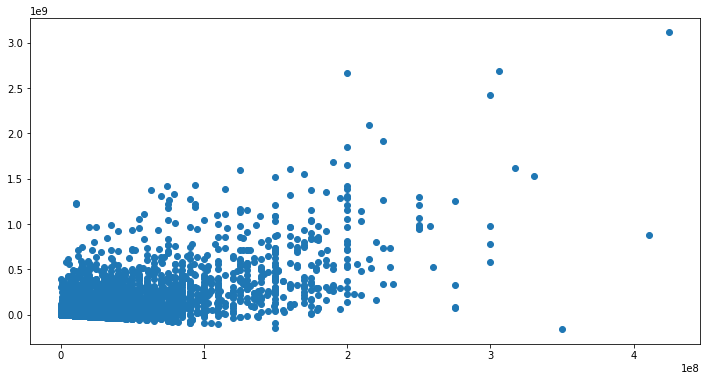

In [14]:
fig, ax = plt.subplots(figsize=(12,6))
x = movie_budget['production_budget']
y = movie_budget['total_margin_$']


ax.scatter(x,y);

#### Observations: 
There is not much of a correlation. Very weak positive correlation, which tells me there are better factors that affect margins besides budget

#### What does the central tendency of movie budgets look like?

In [15]:
movie_budget.describe()

,id,production_budget,domestic_gross,worldwide_gross,total_gross,total_margin_$,total_margin_%,domestic_margin_$,domestic_margin_%
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03,5782.000000,5.782000e+03,5782.000000
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07,1.333608e+08,1.017730e+08,678.370158,1.028557e+07,198.354021
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08,2.399411e+08,2.108880e+08,5492.209049,4.992137e+07,2608.659060
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-1.574753e+08,-100.000000,-3.072376e+08,-100.000000
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06,6.448924e+06,-3.098222e+05,-20.287843,-9.132757e+06,-79.436711
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07,4.605855e+07,2.499538e+07,165.931482,-3.487755e+05,-12.167378
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07,1.506937e+08,1.111648e+08,489.317031,1.778144e+07,105.814816
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,3.536853e+09,3.111853e+09,359900.000000,6.306622e+08,179900.000000


In [16]:
# Make production_budget, domestic_gross, worldwide_gross, total_gross, total_margin_$ , domestic_margin_$
# into millions 

movie_budget['production_budget'] = movie_budget['production_budget'].map(lambda x: x/1000000)

In [17]:
movie_budget['domestic_gross'] = movie_budget['domestic_gross'].map(lambda x: x/1000000)
movie_budget['worldwide_gross'] = movie_budget['worldwide_gross'].map(lambda x: x/1000000)
movie_budget['total_gross'] = movie_budget['total_gross'].map(lambda x: x/1000000)
movie_budget['total_margin_$'] = movie_budget['total_margin_$'].map(lambda x: x/1000000)
movie_budget['domestic_margin_$'] = movie_budget['domestic_margin_$'].map(lambda x: x/1000000)

In [18]:
movie_budget.describe()

,id,production_budget,domestic_gross,worldwide_gross,total_gross,total_margin_$,total_margin_%,domestic_margin_$,domestic_margin_%
count,5782.000000,5782.000000,5782.000000,5782.000000,5782.000000,5782.000000,5782.000000,5782.000000,5782.000000
mean,50.372363,31.587757,41.873327,91.487461,133.360788,101.773031,678.370158,10.285570,198.354021
std,28.821076,41.812077,68.240597,174.719969,239.941100,210.887978,5492.209049,49.921366,2608.659060
min,1.000000,0.001100,0.000000,0.000000,0.000000,-157.475300,-100.000000,-307.237650,-100.000000
25%,25.000000,5.000000,1.429534,4.125415,6.448924,-0.309822,-20.287843,-9.132757,-79.436711
50%,50.000000,17.000000,17.225945,27.984448,46.058546,24.995378,165.931482,-0.348776,-12.167378
75%,75.000000,40.000000,52.348662,97.645837,150.693737,111.164788,489.317031,17.781444,105.814816
max,100.000000,425.000000,936.662225,2776.345279,3536.852904,3111.852904,359900.000000,630.662225,179900.000000


array([[<AxesSubplot:title={'center':'production_budget'}>]], dtype=object)

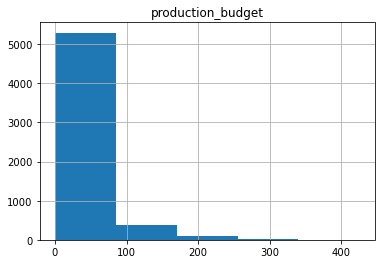

In [19]:
movie_budget.hist(column=['production_budget'],bins=5)

array([[<AxesSubplot:title={'center':'total_gross'}>]], dtype=object)

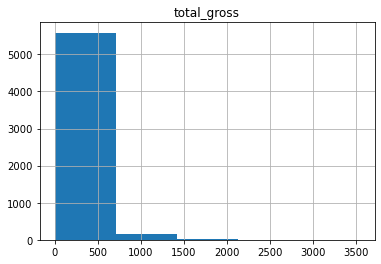

In [20]:
movie_budget.hist(column=['total_gross'],bins=5)

array([[<AxesSubplot:title={'center':'total_margin_%'}>]], dtype=object)

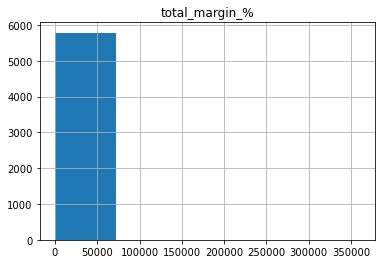

In [21]:
movie_budget.hist(column=['total_margin_%'],bins=5)

In [22]:
print("Median:", movie_budget['production_budget'].median(),movie_budget['total_gross'].median())

Median: 17.0 46.058546


#### Deep dive into genres

In [23]:
genres = pd.DataFrame(movies_agg['genres'].value_counts())

genres.head(10)

,genres
Drama,11612
Documentary,10313
Comedy,5613
Horror,2692
"Comedy,Drama",2617
Thriller,1555
"Drama,Romance",1510
"Comedy,Romance",1236
"Comedy,Drama,Romance",1208
"Horror,Thriller",1004


In [24]:
movies_agg.isna().sum()

movie_id            0
primary_title       0
original_title      0
genres            804
start_year          0
averagerating       0
numvotes            0
total_weight        0
dtype: int64

In [25]:
# Replacing duplicates of the missing genres with "Unknown", since nulls represent ~%1 of the data.
# Won't drop them in case we need this data config later. 

movies_agg['genres'].fillna("Unkown",inplace=True)
movies_agg.isna().sum()

movie_id          0
primary_title     0
original_title    0
genres            0
start_year        0
averagerating     0
numvotes          0
total_weight      0
dtype: int64

#### Seperating out the genres into separate columns

In [26]:
movies_agg[['Genre_1','Genre_2','Genre_3']] = movies_agg['genres'].str.split(',',expand=True)
movies_agg.head(10)

,movie_id,primary_title,original_title,genres,start_year,averagerating,numvotes,total_weight,Genre_1,Genre_2,Genre_3
0,tt1375666,Inception,Inception,"Action,Adventure,Sci-Fi",2010,8.8,1841066,16201380.8,Action,Adventure,Sci-Fi
1,tt1345836,The Dark Knight Rises,The Dark Knight Rises,"Action,Thriller",2012,8.4,1387769,11657259.6,Action,Thriller,None
2,tt0816692,Interstellar,Interstellar,"Adventure,Drama,Sci-Fi",2014,8.6,1299334,11174272.4,Adventure,Drama,Sci-Fi
3,tt1853728,Django Unchained,Django Unchained,"Drama,Western",2012,8.4,1211405,10175802.0,Drama,Western,None
4,tt0848228,The Avengers,The Avengers,"Action,Adventure,Sci-Fi",2012,8.1,1183655,9587605.5,Action,Adventure,Sci-Fi
5,tt0993846,The Wolf of Wall Street,The Wolf of Wall Street,"Biography,Crime,Drama",2013,8.2,1035358,8489935.6,Biography,Crime,Drama
6,tt1130884,Shutter Island,Shutter Island,"Mystery,Thriller",2010,8.1,1005960,8148276.0,Mystery,Thriller,None
7,tt2015381,Guardians of the Galaxy,Guardians of the Galaxy,"Action,Adventure,Comedy",2014,8.1,948394,7681991.4,Action,Adventure,Comedy
8,tt1431045,Deadpool,Deadpool,"Action,Adventure,Comedy",2016,8.0,820847,6566776.0,Action,Adventure,Comedy
9,tt1392190,Mad Max: Fury Road,Mad Max: Fury Road,"Action,Adventure,Sci-Fi",2015,8.1,780910,6325371.0,Action,Adventure,Sci-Fi


In [27]:
# Filling Genre_2 and Genre_3 nulls with 'N/A since not all movies have multiple genres

movies_agg['Genre_2'].fillna('N/A',inplace=True)
movies_agg['Genre_3'].fillna('N/A',inplace=True)
movies_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie_id        73856 non-null  object 
 1   primary_title   73856 non-null  object 
 2   original_title  73856 non-null  object 
 3   genres          73856 non-null  object 
 4   start_year      73856 non-null  int64  
 5   averagerating   73856 non-null  float64
 6   numvotes        73856 non-null  int64  
 7   total_weight    73856 non-null  float64
 8   Genre_1         73856 non-null  object 
 9   Genre_2         73856 non-null  object 
 10  Genre_3         73856 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 6.2+ MB


### Combine movies_agg with movie_budgets

#### Cleaning titles for movie_agg for join

In [28]:
import string

def remove_punctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation,'')
    return text

In [29]:
#Using original title because it joined more results than primary in draft notebook

movies_agg['clean_title'] = movies_agg['original_title'].apply(remove_punctuation)
movies_agg['clean_title'] = movies_agg['clean_title'].map(lambda x: x.lower())
movies_agg['clean_title'] = movies_agg['clean_title'].map(lambda x: x.replace(' ',''))
movies_agg.head(10)

,movie_id,primary_title,original_title,genres,start_year,averagerating,numvotes,total_weight,Genre_1,Genre_2,Genre_3,clean_title
0,tt1375666,Inception,Inception,"Action,Adventure,Sci-Fi",2010,8.8,1841066,16201380.8,Action,Adventure,Sci-Fi,inception
1,tt1345836,The Dark Knight Rises,The Dark Knight Rises,"Action,Thriller",2012,8.4,1387769,11657259.6,Action,Thriller,N/A,thedarkknightrises
2,tt0816692,Interstellar,Interstellar,"Adventure,Drama,Sci-Fi",2014,8.6,1299334,11174272.4,Adventure,Drama,Sci-Fi,interstellar
3,tt1853728,Django Unchained,Django Unchained,"Drama,Western",2012,8.4,1211405,10175802.0,Drama,Western,N/A,djangounchained
4,tt0848228,The Avengers,The Avengers,"Action,Adventure,Sci-Fi",2012,8.1,1183655,9587605.5,Action,Adventure,Sci-Fi,theavengers
5,tt0993846,The Wolf of Wall Street,The Wolf of Wall Street,"Biography,Crime,Drama",2013,8.2,1035358,8489935.6,Biography,Crime,Drama,thewolfofwallstreet
6,tt1130884,Shutter Island,Shutter Island,"Mystery,Thriller",2010,8.1,1005960,8148276.0,Mystery,Thriller,N/A,shutterisland
7,tt2015381,Guardians of the Galaxy,Guardians of the Galaxy,"Action,Adventure,Comedy",2014,8.1,948394,7681991.4,Action,Adventure,Comedy,guardiansofthegalaxy
8,tt1431045,Deadpool,Deadpool,"Action,Adventure,Comedy",2016,8.0,820847,6566776.0,Action,Adventure,Comedy,deadpool
9,tt1392190,Mad Max: Fury Road,Mad Max: Fury Road,"Action,Adventure,Sci-Fi",2015,8.1,780910,6325371.0,Action,Adventure,Sci-Fi,madmaxfuryroad


In [30]:
#Concatenating year and title in case of title dupes

In [31]:
movies_agg['year_title'] = movies_agg['start_year'].astype(str) + movies_agg['clean_title']

In [32]:
movies_agg.nunique()

movie_id          73856
primary_title     69993
original_title    71097
genres              924
start_year           10
averagerating        91
numvotes           7349
total_weight      22449
Genre_1              26
Genre_2              26
Genre_3              22
clean_title       70804
year_title        73413
dtype: int64

In [33]:
# Dropping duplicate values using the year_title column 

movies_agg.dropna(subset=['year_title'],inplace=True)
movies_agg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie_id        73856 non-null  object 
 1   primary_title   73856 non-null  object 
 2   original_title  73856 non-null  object 
 3   genres          73856 non-null  object 
 4   start_year      73856 non-null  int64  
 5   averagerating   73856 non-null  float64
 6   numvotes        73856 non-null  int64  
 7   total_weight    73856 non-null  float64
 8   Genre_1         73856 non-null  object 
 9   Genre_2         73856 non-null  object 
 10  Genre_3         73856 non-null  object 
 11  clean_title     73856 non-null  object 
 12  year_title      73856 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 7.9+ MB


In [34]:
# Looking at best column to join movie_budget 

movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
 6   total_gross        5782 non-null   float64
 7   total_margin_$     5782 non-null   float64
 8   total_margin_%     5782 non-null   float64
 9   domestic_margin_$  5782 non-null   float64
 10  domestic_margin_%  5782 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 497.0+ KB


In [35]:
#Cleaning Titles
movie_budget['clean_title'] = movie_budget['movie'].apply(remove_punctuation)
movie_budget['clean_title'] = movie_budget['clean_title'].map(lambda x: x.lower())
movie_budget['clean_title'] = movie_budget['clean_title'].map(lambda x: x.replace(' ',''))

In [36]:
# Making a column just for year
movie_budget['release_year'] = movie_budget['release_date'].map(lambda x: x.split(',')[1].strip() )

In [37]:
# Concatenate year_title
movie_budget['year_title'] = movie_budget['release_year'] + movie_budget['clean_title']

In [38]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
 6   total_gross        5782 non-null   float64
 7   total_margin_$     5782 non-null   float64
 8   total_margin_%     5782 non-null   float64
 9   domestic_margin_$  5782 non-null   float64
 10  domestic_margin_%  5782 non-null   float64
 11  clean_title        5782 non-null   object 
 12  release_year       5782 non-null   object 
 13  year_title         5782 non-null   object 
dtypes: float64(8), int64(1), object(5)
memory usage: 632.5+ KB


In [39]:
movie_budget.nunique()

id                    100
release_date         2418
movie                5698
production_budget     509
domestic_gross       5164
worldwide_gross      5356
total_gross          5363
total_margin_$       5497
total_margin_%       5402
domestic_margin_$    5345
domestic_margin_%    5216
clean_title          5698
release_year           96
year_title           5781
dtype: int64

In [40]:
genre_budgets = movie_budget.merge(movies_agg,how='left',left_on='clean_title',right_on='clean_title')
genre_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6345 entries, 0 to 6344
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 6345 non-null   int64  
 1   release_date       6345 non-null   object 
 2   movie              6345 non-null   object 
 3   production_budget  6345 non-null   float64
 4   domestic_gross     6345 non-null   float64
 5   worldwide_gross    6345 non-null   float64
 6   total_gross        6345 non-null   float64
 7   total_margin_$     6345 non-null   float64
 8   total_margin_%     6345 non-null   float64
 9   domestic_margin_$  6345 non-null   float64
 10  domestic_margin_%  6345 non-null   float64
 11  clean_title        6345 non-null   object 
 12  release_year       6345 non-null   object 
 13  year_title_x       6345 non-null   object 
 14  movie_id           2798 non-null   object 
 15  primary_title      2798 non-null   object 
 16  original_title     2798 

In [41]:
# Note: there are 2.8K movies from which we are assessing the normal profitability of genres
# Removing Null values that don't have any financial data 

genre_budgets.dropna(subset=['movie_id'],inplace=True)
genre_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2798 entries, 1 to 6343
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2798 non-null   int64  
 1   release_date       2798 non-null   object 
 2   movie              2798 non-null   object 
 3   production_budget  2798 non-null   float64
 4   domestic_gross     2798 non-null   float64
 5   worldwide_gross    2798 non-null   float64
 6   total_gross        2798 non-null   float64
 7   total_margin_$     2798 non-null   float64
 8   total_margin_%     2798 non-null   float64
 9   domestic_margin_$  2798 non-null   float64
 10  domestic_margin_%  2798 non-null   float64
 11  clean_title        2798 non-null   object 
 12  release_year       2798 non-null   object 
 13  year_title_x       2798 non-null   object 
 14  movie_id           2798 non-null   object 
 15  primary_title      2798 non-null   object 
 16  original_title     2798 

### Start building genre_financials table

In [42]:
genre_budgets.describe()

,id,production_budget,domestic_gross,worldwide_gross,total_gross,total_margin_$,total_margin_%,domestic_margin_$,domestic_margin_%,start_year,averagerating,numvotes,total_weight
count,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2.798000e+03,2.798000e+03
mean,51.062902,34.351365,42.799779,102.850257,145.650036,111.298671,532.973216,8.448414,113.663339,2013.894210,6.236776,6.978876e+04,4.875572e+05
std,28.434414,47.369608,72.438042,195.021585,264.527641,230.412952,2313.778599,51.404923,814.770394,2.558761,1.196665,1.352773e+05,1.042142e+06
min,1.000000,0.001400,0.000000,0.000000,0.000000,-157.475300,-100.000000,-307.237650,-100.000000,2010.000000,1.600000,5.000000e+00,1.400000e+01
25%,27.000000,5.000000,0.413046,2.344041,3.390907,-0.863642,-49.621579,-10.027966,-91.673100,2012.000000,5.600000,1.742500e+02,9.436250e+02
50%,51.000000,17.000000,16.208896,30.568731,47.112790,26.381137,146.696341,-0.950000,-27.264332,2014.000000,6.400000,1.188600e+04,7.005180e+04
75%,76.000000,40.000000,52.994344,103.171135,158.962565,119.065152,454.829442,16.241233,78.152683,2016.000000,7.100000,8.169975e+04,5.237915e+05
max,100.000000,410.600000,700.059566,2208.208395,2867.572339,2667.572339,64320.884000,500.059566,22664.410000,2019.000000,9.400000,1.841066e+06,1.620138e+07


In [43]:
# Extra table for possible presentation visual: genre frequencies 

genre_table = pd.DataFrame(genre_budgets[['Genre_1','Genre_2','Genre_3']].apply(pd.Series.value_counts))
genre_table.fillna(0,inplace=True)
genre_table['total'] = genre_table['Genre_1'] + genre_table['Genre_2'] + genre_table['Genre_3']
genre_table

,Genre_1,Genre_2,Genre_3,total
Action,640.0,0.0,0.0,640.0
Adventure,225.0,236.0,0.0,461.0
Animation,23.0,94.0,18.0,135.0
Biography,169.0,29.0,4.0,202.0
Comedy,495.0,148.0,115.0,758.0
Crime,145.0,157.0,57.0,359.0
Documentary,158.0,32.0,11.0,201.0
Drama,632.0,564.0,197.0,1393.0
Family,16.0,66.0,67.0,149.0
Fantasy,11.0,70.0,98.0,179.0


In [44]:
## Checked central tendency grouping by genre1,2,3. Similar, so will use Genre_1 as proxy 

In [45]:
#Genre Margins
genre_margins = pd.DataFrame(pd.DataFrame(genre_budgets.groupby('Genre_1').mean())['total_margin_%'])
genre_margins.drop(index='Unkown',inplace=True)

#Genre Investments
genre_investments = pd.DataFrame(genre_budgets.groupby('Genre_1').mean()['production_budget'])
genre_investments.drop(index='Unkown',inplace=True)

#Genre Gross
genre_gross = pd.DataFrame(genre_budgets.groupby('Genre_1').mean()['total_gross'])
genre_gross.drop(index='Unkown',inplace=True)

#Combining them into new table genre_financials 
genre_financials = genre_margins.merge(genre_gross,how='left',left_on='Genre_1',right_on='Genre_1')
genre_financials = genre_financials.merge(genre_investments,how='left',left_on='Genre_1',right_on='Genre_1')
genre_financials

,total_margin_%,total_gross,production_budget
Genre_1,,,
Action,396.211478,253.380329,64.006219
Adventure,367.571404,329.519055,67.744996
Animation,617.507092,254.015867,46.403880
Biography,694.690946,100.277842,23.696777
Comedy,390.048273,89.465797,20.532247
Crime,358.655961,84.176106,22.052189
Documentary,425.078017,86.028972,23.260799
Drama,459.284215,70.056507,18.189847
Family,1105.607554,310.809300,28.636828


In [46]:
genre_financials.sort_values(by=['total_margin_%'],ascending=False,inplace=True)

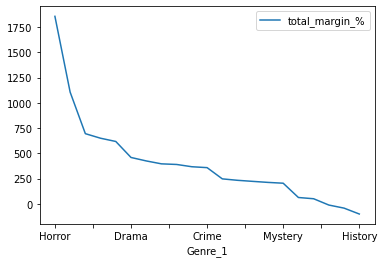

In [47]:
genre_financials.plot(y='total_margin_%');

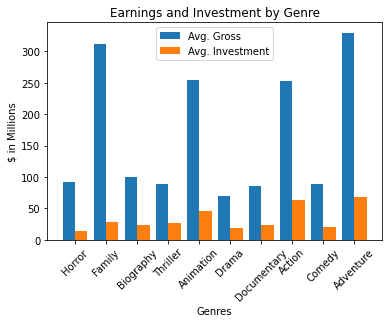

In [48]:
X = list(genre_financials.head(10).index)
Y = genre_financials.head(10)['total_gross']
Z = genre_financials.head(10)['production_budget']
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Y, 0.4, label = 'Avg. Gross')
plt.bar(X_axis + 0.2, Z, 0.4, label = 'Avg. Investment')

plt.xticks(X_axis, X)
plt.xticks(rotation = 45)
plt.xlabel("Genres")
plt.ylabel("$ in Millions")
plt.title("Earnings and Investment by Genre")
plt.legend()
plt.show()

## Notes so far...

1. Movies make a lot more money if they are run internationally 
2. Want to focus on  Family/Animation, Horror Thriller, Bio + Doc to start
3. Skip on Action/Adventure due to high investment cost 

## Looking into international margins

In [49]:
movie_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [50]:
# I will use this table to figure out if a movie is shown both domestically and internationally 

In [51]:
# check how many unique movies are in movie_akas

movie_akas.nunique()

movie_id             122302
ordering                 61
title                252781
region                  213
language                 76
types                    10
attributes               77
is_original_title         2
dtype: int64

In [52]:
# Determine how to filter for US and International
set(movie_akas['region'].unique())

{'AD',
 'AE',
 'AF',
 'AG',
 'AI',
 'AL',
 'AM',
 'AN',
 'AO',
 'AQ',
 'AR',
 'AS',
 'AT',
 'AU',
 'AW',
 'AZ',
 'BA',
 'BB',
 'BD',
 'BE',
 'BF',
 'BG',
 'BH',
 'BI',
 'BJ',
 'BM',
 'BN',
 'BO',
 'BR',
 'BS',
 'BT',
 'BUMM',
 'BY',
 'BZ',
 'CA',
 'CD',
 'CF',
 'CG',
 'CH',
 'CI',
 'CL',
 'CM',
 'CN',
 'CO',
 'CR',
 'CSHH',
 'CSXX',
 'CU',
 'CV',
 'CY',
 'CZ',
 'DE',
 'DK',
 'DM',
 'DO',
 'DZ',
 'EC',
 'EE',
 'EG',
 'EH',
 'ER',
 'ES',
 'ET',
 'FI',
 'FJ',
 'FO',
 'FR',
 'GA',
 'GB',
 'GE',
 'GH',
 'GL',
 'GM',
 'GP',
 'GR',
 'GT',
 'GU',
 'GW',
 'HK',
 'HN',
 'HR',
 'HT',
 'HU',
 'ID',
 'IE',
 'IL',
 'IM',
 'IN',
 'IQ',
 'IR',
 'IS',
 'IT',
 'JM',
 'JO',
 'JP',
 'KE',
 'KG',
 'KH',
 'KN',
 'KP',
 'KR',
 'KW',
 'KY',
 'KZ',
 'LA',
 'LB',
 'LC',
 'LI',
 'LK',
 'LR',
 'LS',
 'LT',
 'LU',
 'LV',
 'LY',
 'MA',
 'MC',
 'MD',
 'ME',
 'MG',
 'MH',
 'MK',
 'ML',
 'MM',
 'MN',
 'MO',
 'MQ',
 'MR',
 'MT',
 'MU',
 'MV',
 'MW',
 'MX',
 'MY',
 'MZ',
 'NC',
 'NE',
 'NG',
 'NI',
 'NL',
 'NO',
 'NP',


In [53]:
# Need to join movies_agg with movie_akas (changed with CASE WHEN to indicate international)

In [54]:
international_movies = pd.read_sql_query('''
WITH movies AS

(

SELECT  
movie_id
, title
, CASE WHEN region = 'US' THEN 'Domestic'
       WHEN region IS NULL THEN 'Unknown'
       ELSE 'International' END AS int_status

FROM movie_akas

)

, domestic AS (

SELECT DISTINCT 
movie_id

FROM movies

WHERE 
int_status = 'Domestic'
)

, international AS (

SELECT DISTINCT 
movie_id

FROM movies

WHERE
int_status = 'International'

)

SELECT DISTINCT 
movie_id

FROM domestic

WHERE movie_id in (SELECT DISTINCT movie_id FROM international)

''',conn)

international_movies

,movie_id
0,tt0369610
1,tt0401729
2,tt1014759
3,tt10446418
4,tt1182315
...,...
10851,tt9310460
10852,tt9358044
10853,tt9562694
10854,tt9705860


In [55]:
int_ids = set(international_movies['movie_id'])
int_ids

{'tt1449379',
 'tt3740778',
 'tt1890512',
 'tt3669824',
 'tt1646985',
 'tt3528498',
 'tt6019206',
 'tt5078134',
 'tt7218564',
 'tt1454468',
 'tt2866660',
 'tt1310653',
 'tt3020226',
 'tt2043801',
 'tt3256812',
 'tt2313306',
 'tt1985017',
 'tt2306342',
 'tt5145662',
 'tt1446672',
 'tt4838338',
 'tt4084952',
 'tt2555268',
 'tt1219289',
 'tt6338476',
 'tt4515698',
 'tt1327709',
 'tt1620449',
 'tt1971352',
 'tt8060624',
 'tt2002789',
 'tt2768084',
 'tt5787862',
 'tt1586525',
 'tt1648201',
 'tt8525070',
 'tt6513406',
 'tt6998650',
 'tt8291232',
 'tt0935075',
 'tt2341778',
 'tt2308711',
 'tt5435114',
 'tt3584486',
 'tt8515442',
 'tt3631112',
 'tt1640486',
 'tt1930322',
 'tt2881698',
 'tt4921370',
 'tt2015478',
 'tt4143384',
 'tt4077570',
 'tt4556370',
 'tt4082644',
 'tt2191618',
 'tt2461462',
 'tt4439102',
 'tt1821455',
 'tt4875774',
 'tt1244658',
 'tt1270761',
 'tt2937254',
 'tt1640116',
 'tt4627384',
 'tt1533013',
 'tt2316817',
 'tt3833520',
 'tt1153700',
 'tt3511546',
 'tt1303680',
 'tt14

In [56]:
# We found 10.8K movies that were shown both in the US and at least one region outside of the US

#### Begin merging international movies to movies agg

In [57]:
movies_agg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie_id        73856 non-null  object 
 1   primary_title   73856 non-null  object 
 2   original_title  73856 non-null  object 
 3   genres          73856 non-null  object 
 4   start_year      73856 non-null  int64  
 5   averagerating   73856 non-null  float64
 6   numvotes        73856 non-null  int64  
 7   total_weight    73856 non-null  float64
 8   Genre_1         73856 non-null  object 
 9   Genre_2         73856 non-null  object 
 10  Genre_3         73856 non-null  object 
 11  clean_title     73856 non-null  object 
 12  year_title      73856 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 7.9+ MB


In [58]:
movies_agg['movie_id'][0] in int_ids

True

In [59]:
# Similar to below, we can check if movie id is in movies_agg and add a new column


movies_agg['is_international'] = movies_agg['movie_id'].map(lambda x: x in int_ids)
movies_agg.head()

,movie_id,primary_title,original_title,genres,start_year,averagerating,numvotes,total_weight,Genre_1,Genre_2,Genre_3,clean_title,year_title,is_international
0,tt1375666,Inception,Inception,"Action,Adventure,Sci-Fi",2010,8.8,1841066,16201380.8,Action,Adventure,Sci-Fi,inception,2010inception,True
1,tt1345836,The Dark Knight Rises,The Dark Knight Rises,"Action,Thriller",2012,8.4,1387769,11657259.6,Action,Thriller,N/A,thedarkknightrises,2012thedarkknightrises,True
2,tt0816692,Interstellar,Interstellar,"Adventure,Drama,Sci-Fi",2014,8.6,1299334,11174272.4,Adventure,Drama,Sci-Fi,interstellar,2014interstellar,True
3,tt1853728,Django Unchained,Django Unchained,"Drama,Western",2012,8.4,1211405,10175802.0,Drama,Western,N/A,djangounchained,2012djangounchained,True
4,tt0848228,The Avengers,The Avengers,"Action,Adventure,Sci-Fi",2012,8.1,1183655,9587605.5,Action,Adventure,Sci-Fi,theavengers,2012theavengers,True


In [60]:

int_genres = pd.DataFrame(movies_agg[movies_agg['is_international']==True])

int_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10233 entries, 0 to 73786
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movie_id          10233 non-null  object 
 1   primary_title     10233 non-null  object 
 2   original_title    10233 non-null  object 
 3   genres            10233 non-null  object 
 4   start_year        10233 non-null  int64  
 5   averagerating     10233 non-null  float64
 6   numvotes          10233 non-null  int64  
 7   total_weight      10233 non-null  float64
 8   Genre_1           10233 non-null  object 
 9   Genre_2           10233 non-null  object 
 10  Genre_3           10233 non-null  object 
 11  clean_title       10233 non-null  object 
 12  year_title        10233 non-null  object 
 13  is_international  10233 non-null  bool   
dtypes: bool(1), float64(2), int64(2), object(9)
memory usage: 1.1+ MB


In [61]:
## Use above data to create visualization about popularity of genres internationally 

In [62]:
# Adjust total_weight to be more digestible
# NICE TO HAVE - put them all in the same scale 

int_genres['total_weight_adj'] = int_genres['total_weight'].map(lambda x: x/1000)

In [63]:
int_genres_weight = pd.DataFrame(int_genres.groupby(by='genres').sum().sort_values(by='total_weight_adj',ascending=False))

In [64]:
int_genres_weight

,start_year,averagerating,numvotes,total_weight,is_international,total_weight_adj
genres,,,,,,
"Action,Adventure,Sci-Fi",163206,476.0,22877297,166630322.1,81,166630.3221
"Action,Adventure,Fantasy",124909,344.5,9611647,64182838.8,62,64182.8388
"Adventure,Animation,Comedy",269934,811.9,8559129,61369240.4,134,61369.2404
"Action,Adventure,Comedy",189400,486.2,7102910,51624705.5,94,51624.7055
"Comedy,Drama,Romance",567891,1705.0,6583516,44895791.2,282,44895.7912
...,...,...,...,...,...,...
"Animation,Drama,Music",2019,6.7,7,46.9,1,0.0469
"Adventure,Family,Horror",2011,4.8,9,43.2,1,0.0432
"Adventure,Documentary,Music",2016,8.0,5,40.0,1,0.0400


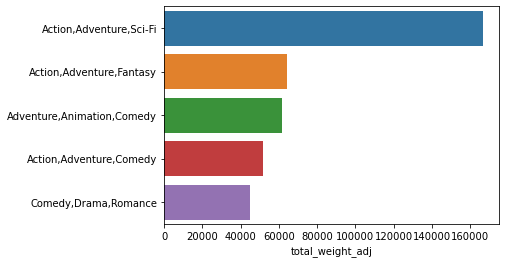

In [65]:
# Visualization of popular genres internationally

sns.barplot(x=int_genres_weight['total_weight_adj'].head(5),y=int_genres_weight.head(5).index.values,orient='h');

<AxesSubplot:xlabel='total_weight_adj', ylabel='Count'>

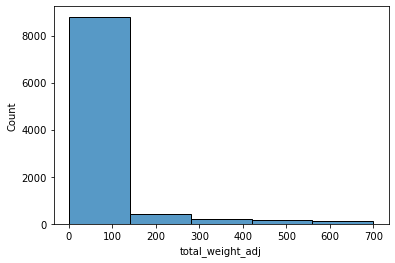

In [66]:
sns.histplot(x=int_genres['total_weight_adj'],bins=5,binrange=(0,700))

In [67]:
#### Create table of example movies that had negative margins domestically, but positive total

In [68]:
example_movies = pd.DataFrame(movie_budget[['movie','production_budget','domestic_margin_$','domestic_margin_%','total_margin_$','total_margin_%']].head(10))

example_movies.iloc[[0,3,4,5,6,7]]

,movie,production_budget,domestic_margin_$,domestic_margin_%,total_margin_$,total_margin_%
0,Avatar,425.0,335.507625,78.942971,3111.852904,732.200683
3,Avengers: Age of Ultron,330.6,128.405868,38.840250,1531.419831,463.224389
4,Star Wars Ep. VIII: The Last Jedi,317.0,303.181382,95.640815,1619.903129,511.010451
5,Star Wars Ep. VII: The Force Awakens,306.0,630.662225,206.098766,2683.973445,877.115505
6,Avengers: Infinity War,300.0,378.815482,126.271827,2426.949682,808.983227
7,Pirates of the Caribbean: At Worldâs End,300.0,9.420425,3.140142,972.840850,324.280283


### Find a studio to acquire that makes horror films
Objective: Show profit potential and avg. cost of investment versus other genres

In [69]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
 6   total_gross        5782 non-null   float64
 7   total_margin_$     5782 non-null   float64
 8   total_margin_%     5782 non-null   float64
 9   domestic_margin_$  5782 non-null   float64
 10  domestic_margin_%  5782 non-null   float64
 11  clean_title        5782 non-null   object 
 12  release_year       5782 non-null   object 
 13  year_title         5782 non-null   object 
dtypes: float64(8), int64(1), object(5)
memory usage: 632.5+ KB


In [70]:
#PART 1
### Need to isolate movie title and studio into new df CALLED studio_movies
### With new df, join  to movies_agg
### From joined table, identify studios by counts of horror films. Visualize

#PART 2
### Using the movie_budget table, figure out economics of chosen studios 
### Economics include avg. investment cost per movie, avg. ROI 

#### Part 1: Joining movie_studios and movies_agg

In [71]:
# Create new df for join with just movies, studio and year information 

studio_movies = pd.DataFrame(movie_gross[['title','studio','year']])
studio_movies.head(25)

,title,studio,year
0,Toy Story 3,BV,2010
1,Alice in Wonderland (2010),BV,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,2010
3,Inception,WB,2010
4,Shrek Forever After,P/DW,2010
5,The Twilight Saga: Eclipse,Sum.,2010
6,Iron Man 2,Par.,2010
7,Tangled,BV,2010
8,Despicable Me,Uni.,2010
9,How to Train Your Dragon,P/DW,2010


In [72]:
### Need to clean titles for join. Due to years in some titles, will need to 


In [73]:
numbers = ['1','2','3','4','5','6','7','8','9','0']

def remove_numbers(text):
    for number in numbers:
        text = text.replace(number,'')
    return text

In [74]:
### 1) Clean titles - lowercase, no space , no punctuation, no numbers
studio_movies['clean_title_2'] = studio_movies['title'].map(lambda x: x.lower())
studio_movies['clean_title_2'] = studio_movies['clean_title_2'].map(lambda x: x.replace(' ',''))
studio_movies['clean_title_2'] = studio_movies['clean_title_2'].apply(remove_punctuation)
studio_movies['clean_title_2'] = studio_movies['clean_title_2'].apply(remove_numbers)
studio_movies.head(5)

,title,studio,year,clean_title_2
0,Toy Story 3,BV,2010,toystory
1,Alice in Wonderland (2010),BV,2010,aliceinwonderland
2,Harry Potter and the Deathly Hallows Part 1,WB,2010,harrypotterandthedeathlyhallowspart
3,Inception,WB,2010,inception
4,Shrek Forever After,P/DW,2010,shrekforeverafter


In [79]:
studio_movies.head()

,title,studio,year,clean_title_2
0,Toy Story 3,BV,2010,toystory
1,Alice in Wonderland (2010),BV,2010,aliceinwonderland
2,Harry Potter and the Deathly Hallows Part 1,WB,2010,harrypotterandthedeathlyhallowspart
3,Inception,WB,2010,inception
4,Shrek Forever After,P/DW,2010,shrekforeverafter


In [81]:
### 2) Concatenate first 6 characters of title, with the year

studio_movies['clean_title_2'] = studio_movies['clean_title_2'].map(lambda x: x[0:6])
studio_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          3387 non-null   object
 1   studio         3382 non-null   object
 2   year           3387 non-null   int64 
 3   clean_title_2  3387 non-null   object
dtypes: int64(1), object(3)
memory usage: 106.0+ KB


In [82]:
studio_movies['clean_title_2'] = studio_movies['year'].astype(str) + studio_movies['clean_title_2'] 

In [83]:
studio_movies.nunique()

title            3386
studio            257
year                9
clean_title_2    3259
dtype: int64

In [84]:
studio_movies['clean_title_2'] = studio_movies['year'].astype(str) + studio_movies['clean_title_2']
studio_movies.nunique()

title            3386
studio            257
year                9
clean_title_2    3259
dtype: int64

In [85]:
studio_movies.drop_duplicates(subset=['clean_title_2'],inplace=True)
studio_movies.nunique()

title            3258
studio            246
year                9
clean_title_2    3259
dtype: int64

In [86]:
studio_movies['clean_title_3'] = studio_movies['title'].map(lambda x: x.lower())
studio_movies['clean_title_3'] = studio_movies['clean_title_3'].map(lambda x: x.replace(' ',''))
studio_movies['clean_title_3'] = studio_movies['clean_title_3'].apply(remove_punctuation)
studio_movies['clean_title_3'] = studio_movies['clean_title_3'].apply(remove_numbers)
studio_movies.head(5)

,title,studio,year,clean_title_2,clean_title_3
0,Toy Story 3,BV,2010,20102010toysto,toystory
1,Alice in Wonderland (2010),BV,2010,20102010alicei,aliceinwonderland
2,Harry Potter and the Deathly Hallows Part 1,WB,2010,20102010harryp,harrypotterandthedeathlyhallowspart
3,Inception,WB,2010,20102010incept,inception
4,Shrek Forever After,P/DW,2010,20102010shrekf,shrekforeverafter


In [87]:
studio_movies['year_title'] = studio_movies['year'].astype(str) + studio_movies['clean_title_3']
studio_movies

,title,studio,year,clean_title_2,clean_title_3,year_title
0,Toy Story 3,BV,2010,20102010toysto,toystory,2010toystory
1,Alice in Wonderland (2010),BV,2010,20102010alicei,aliceinwonderland,2010aliceinwonderland
2,Harry Potter and the Deathly Hallows Part 1,WB,2010,20102010harryp,harrypotterandthedeathlyhallowspart,2010harrypotterandthedeathlyhallowspart
3,Inception,WB,2010,20102010incept,inception,2010inception
4,Shrek Forever After,P/DW,2010,20102010shrekf,shrekforeverafter,2010shrekforeverafter
...,...,...,...,...,...,...
3382,The Quake,Magn.,2018,20182018thequa,thequake,2018thequake
3383,Edward II (2018 re-release),FM,2018,20182018edward,edwardiirerelease,2018edwardiirerelease
3384,El Pacto,Sony,2018,20182018elpact,elpacto,2018elpacto
3385,The Swan,Synergetic,2018,20182018theswa,theswan,2018theswan


In [88]:
### 3) Join to movies_agg

In [89]:
movies_agg.head()

,movie_id,primary_title,original_title,genres,start_year,averagerating,numvotes,total_weight,Genre_1,Genre_2,Genre_3,clean_title,year_title,is_international
0,tt1375666,Inception,Inception,"Action,Adventure,Sci-Fi",2010,8.8,1841066,16201380.8,Action,Adventure,Sci-Fi,inception,2010inception,True
1,tt1345836,The Dark Knight Rises,The Dark Knight Rises,"Action,Thriller",2012,8.4,1387769,11657259.6,Action,Thriller,N/A,thedarkknightrises,2012thedarkknightrises,True
2,tt0816692,Interstellar,Interstellar,"Adventure,Drama,Sci-Fi",2014,8.6,1299334,11174272.4,Adventure,Drama,Sci-Fi,interstellar,2014interstellar,True
3,tt1853728,Django Unchained,Django Unchained,"Drama,Western",2012,8.4,1211405,10175802.0,Drama,Western,N/A,djangounchained,2012djangounchained,True
4,tt0848228,The Avengers,The Avengers,"Action,Adventure,Sci-Fi",2012,8.1,1183655,9587605.5,Action,Adventure,Sci-Fi,theavengers,2012theavengers,True


In [90]:
# Create new column in movies_agg that determines if a movie has horror listed as a genre

horror = 'Horror'

movies_agg['is_horror'] = movies_agg['genres'].map(lambda x: horror in x)

movies_agg

,movie_id,primary_title,original_title,genres,start_year,averagerating,numvotes,total_weight,Genre_1,Genre_2,Genre_3,clean_title,year_title,is_international,is_horror
0,tt1375666,Inception,Inception,"Action,Adventure,Sci-Fi",2010,8.8,1841066,16201380.8,Action,Adventure,Sci-Fi,inception,2010inception,True,False
1,tt1345836,The Dark Knight Rises,The Dark Knight Rises,"Action,Thriller",2012,8.4,1387769,11657259.6,Action,Thriller,N/A,thedarkknightrises,2012thedarkknightrises,True,False
2,tt0816692,Interstellar,Interstellar,"Adventure,Drama,Sci-Fi",2014,8.6,1299334,11174272.4,Adventure,Drama,Sci-Fi,interstellar,2014interstellar,True,False
3,tt1853728,Django Unchained,Django Unchained,"Drama,Western",2012,8.4,1211405,10175802.0,Drama,Western,N/A,djangounchained,2012djangounchained,True,False
4,tt0848228,The Avengers,The Avengers,"Action,Adventure,Sci-Fi",2012,8.1,1183655,9587605.5,Action,Adventure,Sci-Fi,theavengers,2012theavengers,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73851,tt9366716,DaGram,DaGram,Comedy,2018,1.2,5,6.0,Comedy,N/A,N/A,dagram,2018dagram,False,False
73852,tt2447822,Momok jangan cari pasal!,Momok jangan cari pasal!,Comedy,2012,1.0,5,5.0,Comedy,N/A,N/A,momokjangancaripasal,2012momokjangancaripasal,False,False
73853,tt6792126,Jak se mori revizori,Jak se mori revizori,Comedy,2018,1.0,5,5.0,Comedy,N/A,N/A,jaksemorirevizori,2018jaksemorirevizori,False,False
73854,tt8426154,Pup Scouts,Pup Scouts,Animation,2018,1.0,5,5.0,Animation,N/A,N/A,pupscouts,2018pupscouts,False,False


In [91]:
studio_movies.head()

,title,studio,year,clean_title_2,clean_title_3,year_title
0,Toy Story 3,BV,2010,20102010toysto,toystory,2010toystory
1,Alice in Wonderland (2010),BV,2010,20102010alicei,aliceinwonderland,2010aliceinwonderland
2,Harry Potter and the Deathly Hallows Part 1,WB,2010,20102010harryp,harrypotterandthedeathlyhallowspart,2010harrypotterandthedeathlyhallowspart
3,Inception,WB,2010,20102010incept,inception,2010inception
4,Shrek Forever After,P/DW,2010,20102010shrekf,shrekforeverafter,2010shrekforeverafter


In [92]:
horror_studios = studio_movies.merge(movies_agg,how='left',left_on='year_title',right_on='year_title')
horror_studios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3295 entries, 0 to 3294
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             3295 non-null   object 
 1   studio            3290 non-null   object 
 2   year              3295 non-null   int64  
 3   clean_title_2     3295 non-null   object 
 4   clean_title_3     3295 non-null   object 
 5   year_title        3295 non-null   object 
 6   movie_id          1734 non-null   object 
 7   primary_title     1734 non-null   object 
 8   original_title    1734 non-null   object 
 9   genres            1734 non-null   object 
 10  start_year        1734 non-null   float64
 11  averagerating     1734 non-null   float64
 12  numvotes          1734 non-null   float64
 13  total_weight      1734 non-null   float64
 14  Genre_1           1734 non-null   object 
 15  Genre_2           1734 non-null   object 
 16  Genre_3           1734 non-null   object 


In [93]:
#dropping nulls because those are non-horror

horror_studios.dropna(inplace=True)
horror_studios.nunique()


title               1696
studio               144
year                   9
clean_title_2       1696
clean_title_3       1692
year_title          1696
movie_id            1732
primary_title       1699
original_title      1697
genres               249
start_year             9
averagerating         64
numvotes            1703
total_weight        1731
Genre_1               17
Genre_2               21
Genre_3               21
clean_title         1692
is_international       2
is_horror              2
dtype: int64

In [94]:
horror_studios[horror_studios['studio'] == 'BH Tilt']

,title,studio,year,clean_title_2,clean_title_3,year_title,movie_id,primary_title,original_title,genres,start_year,averagerating,numvotes,total_weight,Genre_1,Genre_2,Genre_3,clean_title,is_international,is_horror
2429,The Darkness,BH Tilt,2016,20162016thedar,thedarkness,2016thedarkness,tt1878841,The Darkness,The Darkness,"Horror,Thriller",2016.0,4.4,12435.0,54714.0,Horror,Thriller,N/A,thedarkness,True,True
2442,Incarnate,BH Tilt,2016,20162016incarn,incarnate,2016incarnate,tt3216348,Incarnate,Incarnate,"Horror,Thriller",2016.0,5.3,10217.0,54150.1,Horror,Thriller,N/A,incarnate,True,True
3126,Unfriended: Dark Web,BH Tilt,2018,20182018unfrie,unfriendeddarkweb,2018unfriendeddarkweb,tt4761916,Unfriended: Dark Web,Unfriended: Dark Web,"Crime,Horror,Mystery",2018.0,5.9,13822.0,81549.8,Crime,Horror,Mystery,unfriendeddarkweb,True,True
3127,Upgrade,BH Tilt,2018,20182018upgrad,upgrade,2018upgrade,tt6499752,Upgrade,Upgrade,"Action,Sci-Fi,Thriller",2018.0,7.6,104978.0,797832.8,Action,Sci-Fi,Thriller,upgrade,True,False


In [95]:
horror_studios = pd.DataFrame(horror_studios[horror_studios['is_horror'] == True])
horror_studios.head(40)

,title,studio,year,clean_title_2,clean_title_3,year_title,movie_id,primary_title,original_title,genres,start_year,averagerating,numvotes,total_weight,Genre_1,Genre_2,Genre_3,clean_title,is_international,is_horror
22,Resident Evil: Afterlife,SGem,2010,20102010reside,residentevilafterlife,2010residentevilafterlife,tt1220634,Resident Evil: Afterlife,Resident Evil: Afterlife,"Action,Adventure,Horror",2010.0,5.9,153270.0,904293.0,Action,Adventure,Horror,residentevilafterlife,True,True
50,The Wolfman,Uni.,2010,20102010thewol,thewolfman,2010thewolfman,tt0780653,The Wolfman,The Wolfman,"Drama,Fantasy,Horror",2010.0,5.8,97873.0,567663.4,Drama,Fantasy,Horror,thewolfman,True,True
57,A Nightmare on Elm Street (2010),WB (NL),2010,20102010anight,anightmareonelmstreet,2010anightmareonelmstreet,tt1179056,A Nightmare on Elm Street,A Nightmare on Elm Street,"Crime,Drama,Horror",2010.0,5.2,85497.0,444584.4,Crime,Drama,Horror,anightmareonelmstreet,True,True
87,Legion (2010),SGem,2010,20102010legion,legion,2010legion,tt1038686,Legion,Legion,"Action,Fantasy,Horror",2010.0,5.2,92709.0,482086.8,Action,Fantasy,Horror,legion,True,True
92,Devil,Uni.,2010,20102010devil,devil,2010devil,tt1314655,Devil,Devil,"Horror,Mystery,Thriller",2010.0,6.2,122080.0,756896.0,Horror,Mystery,Thriller,devil,True,True
100,The Crazies,Over.,2010,20102010thecra,thecrazies,2010thecrazies,tt0455407,The Crazies,The Crazies,"Horror,Thriller",2010.0,6.5,104465.0,679022.5,Horror,Thriller,N/A,thecrazies,True,True
137,Let Me In,Over.,2010,20102010letmei,letmein,2010letmein,tt1228987,Let Me In,Let Me In,"Drama,Fantasy,Horror",2010.0,7.1,107012.0,759785.2,Drama,Fantasy,Horror,letmein,True,True
141,My Soul to Take,Uni.,2010,20102010mysoul,mysoultotake,2010mysoultotake,tt0872230,My Soul to Take,My Soul to Take,"Horror,Mystery,Thriller",2010.0,4.8,18381.0,88228.8,Horror,Mystery,Thriller,mysoultotake,True,True
171,Cyrus,FoxS,2010,20102010cyrus,cyrus,2010cyrus,tt1327709,Cyrus,Cyrus,"Crime,Horror,Mystery",2010.0,4.7,944.0,4436.8,Crime,Horror,Mystery,cyrus,True,True
203,The Killer Inside Me,IFC,2010,20102010thekil,thekillerinsideme,2010thekillerinsideme,tt0954947,The Killer Inside Me,The Killer Inside Me,"Crime,Drama,Horror",2010.0,6.1,31727.0,193534.7,Crime,Drama,Horror,thekillerinsideme,False,True


In [96]:
horror_studios['studio'].value_counts().head(30)

Uni.       23
SGem       13
LGF        10
WB (NL)     9
Fox         9
Par.        9
IFC         5
WB          5
Magn.       4
Sony        4
A24         4
W/Dim.      3
Rela.       3
BH Tilt     3
STX         3
Over.       2
TriS        2
Focus       2
BG          2
RAtt.       2
BV          2
LG/S        2
Triu        1
MNE         1
Sum.        1
Eros        1
MBox        1
PH          1
FM          1
RLJ         1
Name: studio, dtype: int64

In [97]:
# find the financials of each studio 
# financials include: avg ROI, avg. Gross, avg. investment 

studio_financials = horror_studios.merge(movie_budget,how='inner',left_on='year_title',right_on='year_title')
studio_financials.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 0 to 114
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              115 non-null    object 
 1   studio             115 non-null    object 
 2   year               115 non-null    int64  
 3   clean_title_2      115 non-null    object 
 4   clean_title_3      115 non-null    object 
 5   year_title         115 non-null    object 
 6   movie_id           115 non-null    object 
 7   primary_title      115 non-null    object 
 8   original_title     115 non-null    object 
 9   genres             115 non-null    object 
 10  start_year         115 non-null    float64
 11  averagerating      115 non-null    float64
 12  numvotes           115 non-null    float64
 13  total_weight       115 non-null    float64
 14  Genre_1            115 non-null    object 
 15  Genre_2            115 non-null    object 
 16  Genre_3            115 non

In [98]:
studio_financials.head(10)

,title,studio,year,clean_title_2,clean_title_3,year_title,movie_id,primary_title,original_title,genres,...,production_budget,domestic_gross,worldwide_gross,total_gross,total_margin_$,total_margin_%,domestic_margin_$,domestic_margin_%,clean_title_y,release_year
0,Resident Evil: Afterlife,SGem,2010,20102010reside,residentevilafterlife,2010residentevilafterlife,tt1220634,Resident Evil: Afterlife,Resident Evil: Afterlife,"Action,Adventure,Horror",...,57.5,60.128566,295.874190,356.002756,298.502756,519.135228,2.628566,4.571419,residentevilafterlife,2010
1,The Wolfman,Uni.,2010,20102010thewol,thewolfman,2010thewolfman,tt0780653,The Wolfman,The Wolfman,"Drama,Fantasy,Horror",...,150.0,62.189884,142.634358,204.824242,54.824242,36.549495,-87.810116,-58.540077,thewolfman,2010
2,A Nightmare on Elm Street (2010),WB (NL),2010,20102010anight,anightmareonelmstreet,2010anightmareonelmstreet,tt1179056,A Nightmare on Elm Street,A Nightmare on Elm Street,"Crime,Drama,Horror",...,35.0,63.075011,117.729621,180.804632,145.804632,416.584663,28.075011,80.214317,anightmareonelmstreet,2010
3,Legion (2010),SGem,2010,20102010legion,legion,2010legion,tt1038686,Legion,Legion,"Action,Fantasy,Horror",...,26.0,40.168080,67.647574,107.815654,81.815654,314.675592,14.168080,54.492615,legion,2010
4,Devil,Uni.,2010,20102010devil,devil,2010devil,tt1314655,Devil,Devil,"Horror,Mystery,Thriller",...,10.0,33.679655,63.354114,97.033769,87.033769,870.337690,23.679655,236.796550,devil,2010
5,The Crazies,Over.,2010,20102010thecra,thecrazies,2010thecrazies,tt0455407,The Crazies,The Crazies,"Horror,Thriller",...,19.0,39.123589,56.445534,95.569123,76.569123,402.995384,20.123589,105.913626,thecrazies,2010
6,Let Me In,Over.,2010,20102010letmei,letmein,2010letmein,tt1228987,Let Me In,Let Me In,"Drama,Fantasy,Horror",...,20.0,12.134935,28.270399,40.405334,20.405334,102.026670,-7.865065,-39.325325,letmein,2010
7,My Soul to Take,Uni.,2010,20102010mysoul,mysoultotake,2010mysoultotake,tt0872230,My Soul to Take,My Soul to Take,"Horror,Mystery,Thriller",...,25.0,14.744435,16.727470,31.471905,6.471905,25.887620,-10.255565,-41.022260,mysoultotake,2010
8,Cyrus,FoxS,2010,20102010cyrus,cyrus,2010cyrus,tt1327709,Cyrus,Cyrus,"Crime,Horror,Mystery",...,7.0,7.468936,10.062896,17.531832,10.531832,150.454743,0.468936,6.699086,cyrus,2010
9,The Killer Inside Me,IFC,2010,20102010thekil,thekillerinsideme,2010thekillerinsideme,tt0954947,The Killer Inside Me,The Killer Inside Me,"Crime,Drama,Horror",...,13.0,0.217277,3.617277,3.834554,-9.165446,-70.503431,-12.782723,-98.328638,thekillerinsideme,2010


In [99]:
studio_financials.describe()

,year,start_year,averagerating,numvotes,total_weight,id,production_budget,domestic_gross,worldwide_gross,total_gross,total_margin_$,total_margin_%,domestic_margin_$,domestic_margin_%
count,115.000000,115.000000,115.000000,115.000000,1.150000e+02,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,2014.382609,2014.382609,5.792174,85229.095652,5.408406e+05,49.286957,25.110435,42.199178,97.387499,139.586678,114.476243,1654.995110,17.088744,500.663016
std,2.573763,2.573763,0.891101,88478.257517,6.404280e+05,28.720604,35.756121,49.909884,129.043965,175.968588,157.432890,6217.086584,46.965691,2197.803419
min,2010.000000,2010.000000,3.200000,10.000000,5.200000e+01,1.000000,0.100000,0.000000,0.094953,0.094953,-17.905047,-99.472483,-87.810116,-100.000000
25%,2012.000000,2012.000000,5.200000,33571.500000,1.748298e+05,25.500000,5.250000,11.621183,21.598774,35.302381,20.420155,98.583963,-7.772013,-42.247203
50%,2015.000000,2015.000000,5.900000,60304.000000,3.674492e+05,51.000000,13.000000,30.577122,63.354114,97.033769,72.288469,416.584663,8.297124,71.374238
75%,2017.000000,2017.000000,6.400000,112971.000000,6.775269e+05,71.000000,30.000000,54.727457,107.417756,168.884493,150.329456,1194.479842,33.037761,349.419135
max,2018.000000,2018.000000,7.700000,553751.000000,3.876257e+06,100.000000,190.000000,327.481748,798.008101,1024.939717,989.939717,64320.884000,292.481748,22664.410000


- Average production budget is 24.6M, std 35.4. 

<AxesSubplot:xlabel='production_budget', ylabel='Count'>

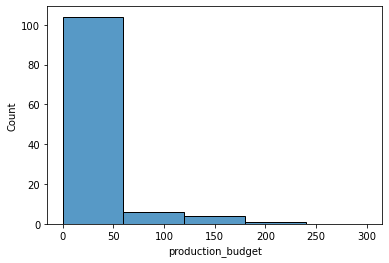

In [100]:
sns.histplot(x=studio_financials['production_budget'],bins=5,binrange=(0,300))

<AxesSubplot:xlabel='total_margin_%', ylabel='Count'>

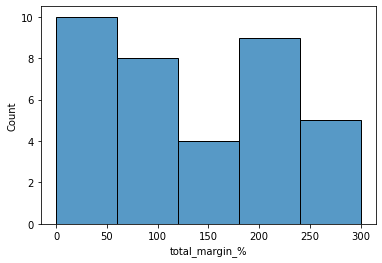

In [101]:
sns.histplot(x=studio_financials['total_margin_%'],bins=5,binrange=(0,300))

<AxesSubplot:xlabel='total_gross', ylabel='Count'>

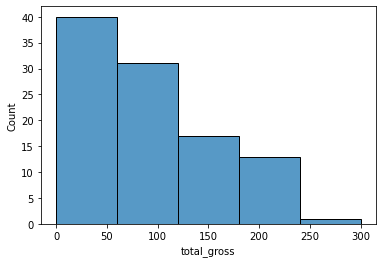

In [102]:
sns.histplot(x=studio_financials['total_gross'],bins=5,binrange=(0,300))

In [103]:
studio_financials.groupby(by='studio').mean().sort_values(by='total_margin_%',ascending=False)

,year,start_year,averagerating,numvotes,total_weight,id,production_budget,domestic_gross,worldwide_gross,total_gross,total_margin_$,total_margin_%,domestic_margin_$,domestic_margin_%
studio,,,,,,,,,,,,,,
WB (NL),2014.125000,2014.125000,6.062500,157288.875000,1.068786e+06,60.875000,19.200000,104.675474,247.880311,352.555785,333.355785,10247.627076,85.475474,3397.389582
Par.,2015.125000,2015.125000,5.725000,147906.875000,1.008443e+06,43.250000,36.625000,67.962823,159.707985,227.670807,191.045807,2795.567166,31.337823,845.779542
LG/S,2012.500000,2012.500000,6.850000,203527.000000,1.394419e+06,69.500000,16.500000,57.233783,101.424707,158.658490,142.158490,2466.082283,40.733783,812.082820
Uni.,2014.782609,2014.782609,5.830435,91110.826087,5.789433e+05,55.086957,20.413043,58.117621,106.050376,164.167998,143.754954,2028.443028,37.704578,677.121277
BST,2018.000000,2018.000000,6.400000,32049.000000,2.051136e+05,70.000000,1.500000,7.690044,14.244931,21.934975,20.434975,1362.331667,6.190044,412.669600
WB,2013.000000,2013.000000,5.300000,104929.000000,6.027439e+05,52.000000,77.600000,57.177902,182.492165,239.670068,162.070068,1308.770923,-20.422098,313.107465
W/Dim.,2013.000000,2013.000000,6.300000,65754.000000,4.142502e+05,97.000000,3.500000,17.418667,27.704111,45.122778,41.622778,1189.222229,13.918667,397.676200
CBS,2012.000000,2012.000000,6.400000,165357.000000,1.058285e+06,18.000000,15.000000,54.333290,128.955898,183.289188,168.289188,1121.927920,39.333290,262.221933
BH Tilt,2016.666667,2016.666667,5.200000,12158.000000,6.347130e+04,55.333333,3.333333,8.140031,12.234639,20.374670,17.041337,1018.282058,4.806698,317.169777


In [104]:
# Want to find average investment and ROI for chosen studio 
# Want to find example success movies 

## Data Visualizations for Presentation

### Domestic v. International Finances by Year 

In [105]:
#Convert release_year to ints

movie_budget['release_year'] = movie_budget['release_year'].map(lambda x: int(x))
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
 6   total_gross        5782 non-null   float64
 7   total_margin_$     5782 non-null   float64
 8   total_margin_%     5782 non-null   float64
 9   domestic_margin_$  5782 non-null   float64
 10  domestic_margin_%  5782 non-null   float64
 11  clean_title        5782 non-null   object 
 12  release_year       5782 non-null   int64  
 13  year_title         5782 non-null   object 
dtypes: float64(8), int64(2), object(4)
memory usage: 632.5+ KB


In [106]:
# Reducing to 2010+ for visual, since we want to look at more modern movie economics

int_financials = pd.DataFrame(movie_budget[movie_budget['release_year']>=2010])
int_financials.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2194 entries, 1 to 5780
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2194 non-null   int64  
 1   release_date       2194 non-null   object 
 2   movie              2194 non-null   object 
 3   production_budget  2194 non-null   float64
 4   domestic_gross     2194 non-null   float64
 5   worldwide_gross    2194 non-null   float64
 6   total_gross        2194 non-null   float64
 7   total_margin_$     2194 non-null   float64
 8   total_margin_%     2194 non-null   float64
 9   domestic_margin_$  2194 non-null   float64
 10  domestic_margin_%  2194 non-null   float64
 11  clean_title        2194 non-null   object 
 12  release_year       2194 non-null   int64  
 13  year_title         2194 non-null   object 
dtypes: float64(8), int64(2), object(4)
memory usage: 257.1+ KB


In [107]:
int_financials = pd.DataFrame(int_financials.groupby(by=['release_year']).mean())

In [108]:
# Create column for international margins, not explicity done before

int_financials['int_margin_$'] = int_financials['total_gross'] - int_financials['domestic_gross'] - int_financials['production_budget']

In [109]:
int_financials = pd.DataFrame(int_financials[['domestic_margin_$','production_budget','int_margin_$']])
int_financials.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 2010 to 2020
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   domestic_margin_$  11 non-null     float64
 1   production_budget  11 non-null     float64
 2   int_margin_$       11 non-null     float64
dtypes: float64(3)
memory usage: 352.0 bytes


In [110]:
int_financials.index.values

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

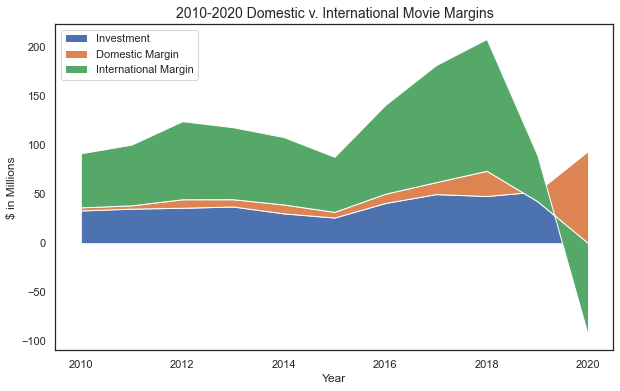

In [374]:
fig, ax = plt.subplots(figsize=(10,6))

#Create Data
x = int_financials.index.values
y1 =  [x for x in int_financials['production_budget']]
y2 =  [x for x in int_financials['domestic_margin_$']]
y3 =  [x for x in int_financials['int_margin_$']]

y = [y1,y2,y3]

#Style

sns.set_theme(style='white')


#Plot
plt.stackplot(x,y, labels=['Investment','Domestic Margin','International Margin'])
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('$ in Millions')
plt.title('2010-2020 Domestic v. International Movie Margins',fontsize=14)


plt.show()


### Margins v. Investment for Example Movies 

In [210]:
example_movies = pd.DataFrame(movie_budget[['movie','production_budget','total_gross','domestic_gross','domestic_margin_$']].head(30))

example_movies = pd.DataFrame(example_movies.iloc[[1,8,9,14,22]])

example_movies['int_margin_$'] = example_movies['total_gross'] - example_movies['domestic_gross'] - example_movies['production_budget']

In [207]:
movie_budget.head(50)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,total_margin_$,total_margin_%,domestic_margin_$,domestic_margin_%,clean_title,release_year,year_title
0,1,"Dec 18, 2009",Avatar,425.0,760.507625,2776.345279,3536.852904,3111.852904,732.200683,335.507625,78.942971,avatar,2009,2009avatar
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410.6,241.063875,1045.663875,1286.727750,876.127750,213.377435,-169.536125,-41.289850,piratesofthecaribbeanonstrangertides,2011,2011piratesofthecaribbeanonstrangertides
2,3,"Jun 7, 2019",Dark Phoenix,350.0,42.762350,149.762350,192.524700,-157.475300,-44.992943,-307.237650,-87.782186,darkphoenix,2019,2019darkphoenix
3,4,"May 1, 2015",Avengers: Age of Ultron,330.6,459.005868,1403.013963,1862.019831,1531.419831,463.224389,128.405868,38.840250,avengersageofultron,2015,2015avengersageofultron
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317.0,620.181382,1316.721747,1936.903129,1619.903129,511.010451,303.181382,95.640815,starwarsepviiithelastjedi,2017,2017starwarsepviiithelastjedi
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306.0,936.662225,2053.311220,2989.973445,2683.973445,877.115505,630.662225,206.098766,starwarsepviitheforceawakens,2015,2015starwarsepviitheforceawakens
6,7,"Apr 27, 2018",Avengers: Infinity War,300.0,678.815482,2048.134200,2726.949682,2426.949682,808.983227,378.815482,126.271827,avengersinfinitywar,2018,2018avengersinfinitywar
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300.0,309.420425,963.420425,1272.840850,972.840850,324.280283,9.420425,3.140142,piratesofthecaribbeanatworldâsend,2007,2007piratesofthecaribbeanatworldâsend
8,9,"Nov 17, 2017",Justice League,300.0,229.024295,655.945209,884.969504,584.969504,194.989835,-70.975705,-23.658568,justiceleague,2017,2017justiceleague
9,10,"Nov 6, 2015",Spectre,300.0,200.074175,879.620923,1079.695098,779.695098,259.898366,-99.925825,-33.308608,spectre,2015,2015spectre


In [211]:
example_movies.head(40)

,movie,production_budget,total_gross,domestic_gross,domestic_margin_$,int_margin_$
1,Pirates of the Caribbean: On Stranger Tides,410.6,1286.727750,241.063875,-169.536125,635.063875
8,Justice League,300.0,884.969504,229.024295,-70.975705,355.945209
9,Spectre,300.0,1079.695098,200.074175,-99.925825,579.620923
14,Tangled,260.0,787.299176,200.821936,-59.178064,326.477240
22,The Fate of the Furious,250.0,1460.611032,225.764765,-24.235235,984.846267


<AxesSubplot:>

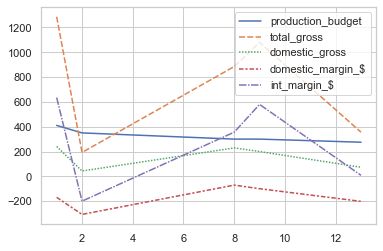

In [132]:
sns.lineplot(data=example_movies)

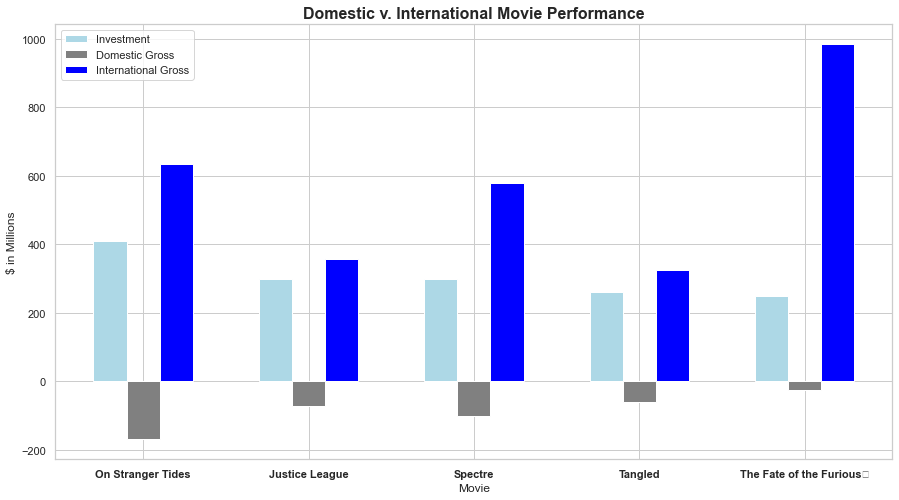

In [214]:
fig,ax = plt.subplots(figsize=(15,8))
x = example_movies['movie'].values
y1 =  [x for x in example_movies['production_budget']]
y2 =  [x for x in example_movies['domestic_margin_$']]
y3 =  [x for x in example_movies['int_margin_$']]

barWidth = 0.2

# Set position of bar on X axis
r1 = np.arange(len(y1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, y1, color='lightblue', width=barWidth, edgecolor='white', label='Investment')
plt.bar(r2, y2, color='gray', width=barWidth, edgecolor='white', label='Domestic Gross')
plt.bar(r3, y3, color='blue', width=barWidth, edgecolor='white', label='International Gross')
 
# Add xticks on the middle of the group bars
plt.xlabel('Movie',fontsize=12)
plt.ylabel('$ in Millions',fontsize=12)
plt.title('Domestic v. International Movie Performance',fontsize=16,fontweight='bold')
plt.xticks([r + barWidth for r in range(len(y1))],['On Stranger Tides', 'Justice League', 'Spectre', 'Tangled','The Fate of the Furious	'],fontweight='bold')
 
# Create legend & Show graphic

plt.legend()
plt.show()

### Making international genre chart presentable

Text(0.5, 1.0, 'Top 5 Popular Genres Internationally')

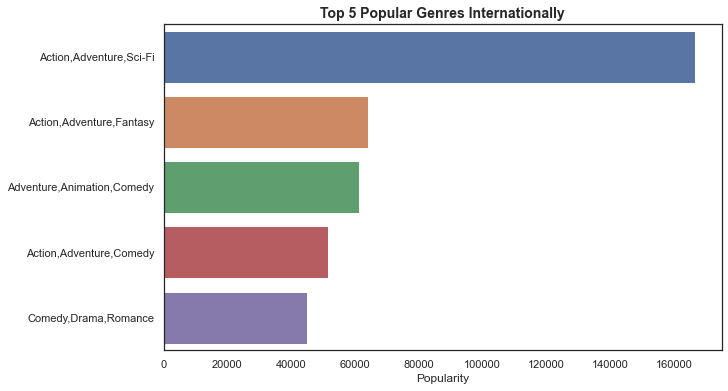

In [376]:
fig,ax = plt.subplots(figsize=(10,6))

sns.barplot(x=int_genres_weight['total_weight_adj'].head(5),y=int_genres_weight.head(5).index.values,orient='h')

plt.xlabel('Popularity')
plt.title('Top 5 Popular Genres Internationally',fontsize=14,fontweight='bold')



In [191]:
int_genres_weight['total_weight_adj'].head(5)

genres
Action,Adventure,Sci-Fi       166630.3221
Action,Adventure,Fantasy       64182.8388
Adventure,Animation,Comedy     61369.2404
Action,Adventure,Comedy        51624.7055
Comedy,Drama,Romance           44895.7912
Name: total_weight_adj, dtype: float64

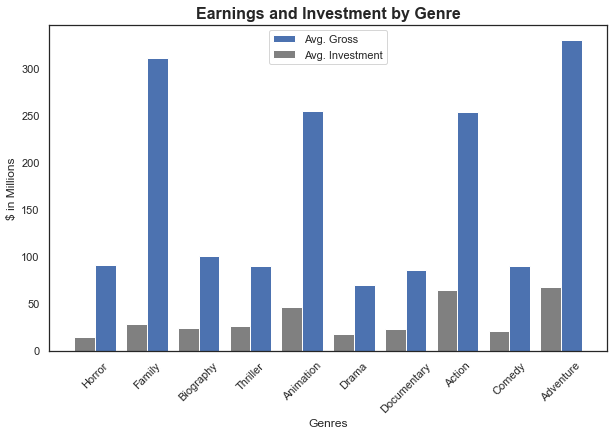

In [375]:
fig,ax=plt.subplots(figsize=(10,6))

X = list(genre_financials.head(10).index)
Y = genre_financials.head(10)['total_gross']
Z = genre_financials.head(10)['production_budget']
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis + 0.2, Y, 0.4, label = 'Avg. Gross')
plt.bar(X_axis - 0.2, Z, 0.4, label = 'Avg. Investment',color='gray')

plt.xticks(X_axis, X)
plt.xticks(rotation = 45)
plt.xlabel("Genres")
plt.ylabel("$ in Millions")
plt.title("Earnings and Investment by Genre",fontsize=16,fontweight='bold')
plt.legend()
plt.show()

### Visualizing Studio Analysis Data

In [217]:
studio_financials

,title,studio,year,clean_title_2,clean_title_3,year_title,movie_id,primary_title,original_title,genres,...,production_budget,domestic_gross,worldwide_gross,total_gross,total_margin_$,total_margin_%,domestic_margin_$,domestic_margin_%,clean_title_y,release_year
0,Resident Evil: Afterlife,SGem,2010,20102010reside,residentevilafterlife,2010residentevilafterlife,tt1220634,Resident Evil: Afterlife,Resident Evil: Afterlife,"Action,Adventure,Horror",...,57.5,60.128566,295.874190,356.002756,298.502756,519.135228,2.628566,4.571419,residentevilafterlife,2010
1,The Wolfman,Uni.,2010,20102010thewol,thewolfman,2010thewolfman,tt0780653,The Wolfman,The Wolfman,"Drama,Fantasy,Horror",...,150.0,62.189884,142.634358,204.824242,54.824242,36.549495,-87.810116,-58.540077,thewolfman,2010
2,A Nightmare on Elm Street (2010),WB (NL),2010,20102010anight,anightmareonelmstreet,2010anightmareonelmstreet,tt1179056,A Nightmare on Elm Street,A Nightmare on Elm Street,"Crime,Drama,Horror",...,35.0,63.075011,117.729621,180.804632,145.804632,416.584663,28.075011,80.214317,anightmareonelmstreet,2010
3,Legion (2010),SGem,2010,20102010legion,legion,2010legion,tt1038686,Legion,Legion,"Action,Fantasy,Horror",...,26.0,40.168080,67.647574,107.815654,81.815654,314.675592,14.168080,54.492615,legion,2010
4,Devil,Uni.,2010,20102010devil,devil,2010devil,tt1314655,Devil,Devil,"Horror,Mystery,Thriller",...,10.0,33.679655,63.354114,97.033769,87.033769,870.337690,23.679655,236.796550,devil,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,Hell Fest,LGF,2018,20182018hellfe,hellfest,2018hellfest,tt1999890,Hell Fest,Hell Fest,Horror,...,5.5,11.107431,18.119231,29.226662,23.726662,431.393855,5.607431,101.953291,hellfest,2018
111,Unfriended: Dark Web,BH Tilt,2018,20182018unfrie,unfriendeddarkweb,2018unfriendeddarkweb,tt4761916,Unfriended: Dark Web,Unfriended: Dark Web,"Crime,Horror,Mystery",...,1.0,8.866745,16.434588,25.301333,24.301333,2430.133300,7.866745,786.674500,unfriendeddarkweb,2018
112,Unsane,BST,2018,20182018unsane,unsane,2018unsane,tt7153766,Unsane,Unsane,"Drama,Horror,Mystery",...,1.5,7.690044,14.244931,21.934975,20.434975,1362.331667,6.190044,412.669600,unsane,2018
113,Suspiria,Amazon,2018,20182018suspir,suspiria,2018suspiria,tt1034415,Suspiria,Suspiria,"Fantasy,Horror,Mystery",...,20.0,2.483472,7.034615,9.518087,-10.481913,-52.409565,-17.516528,-87.582640,suspiria,2018


In [220]:
studio_movies

,title,studio,year,clean_title_2,clean_title_3,year_title
0,Toy Story 3,BV,2010,20102010toysto,toystory,2010toystory
1,Alice in Wonderland (2010),BV,2010,20102010alicei,aliceinwonderland,2010aliceinwonderland
2,Harry Potter and the Deathly Hallows Part 1,WB,2010,20102010harryp,harrypotterandthedeathlyhallowspart,2010harrypotterandthedeathlyhallowspart
3,Inception,WB,2010,20102010incept,inception,2010inception
4,Shrek Forever After,P/DW,2010,20102010shrekf,shrekforeverafter,2010shrekforeverafter
...,...,...,...,...,...,...
3382,The Quake,Magn.,2018,20182018thequa,thequake,2018thequake
3383,Edward II (2018 re-release),FM,2018,20182018edward,edwardiirerelease,2018edwardiirerelease
3384,El Pacto,Sony,2018,20182018elpact,elpacto,2018elpacto
3385,The Swan,Synergetic,2018,20182018theswa,theswan,2018theswan


In [236]:
visual_studio_movies = pd.DataFrame(movie_gross[['title','studio','year']])
visual_studio_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   3387 non-null   object
 1   studio  3382 non-null   object
 2   year    3387 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 79.5+ KB


In [222]:
# studio_movies['clean_title_2'] = studio_movies['title'].map(lambda x: x.lower())
# studio_movies['clean_title_2'] = studio_movies['clean_title_2'].map(lambda x: x.replace(' ',''))
# studio_movies['clean_title_2'] = studio_movies['clean_title_2'].apply(remove_punctuation)
# studio_movies['clean_title_2'] = studio_movies['clean_title_2'].apply(remove_numbers)

In [238]:
visual_studio_movies['clean_title_2'] = visual_studio_movies['title'].map(lambda x: x.lower())

In [239]:
visual_studio_movies['clean_title_2'] = visual_studio_movies['clean_title_2'].map(lambda x: x.replace(' ',''))

In [240]:
visual_studio_movies['clean_title_2'] = visual_studio_movies['clean_title_2'].apply(remove_punctuation)

In [241]:
visual_studio_movies['clean_title_2'] = visual_studio_movies['clean_title_2'].apply(remove_numbers)

In [242]:
visual_studio_movies['year_title'] = visual_studio_movies['year'].astype(str) + visual_studio_movies['clean_title_2']

In [227]:
visual_movies_agg = pd.DataFrame(movies_agg)

In [229]:
visual_movies_agg['clean_title_new'] = visual_movies_agg['clean_title'].apply(remove_numbers)

In [232]:
visual_movies_agg['year_title'] = visual_movies_agg['start_year'].astype(str) + visual_movies_agg['clean_title_new']

In [243]:
visual_movies_agg

,movie_id,primary_title,original_title,genres,start_year,averagerating,numvotes,total_weight,Genre_1,Genre_2,Genre_3,clean_title,year_title,is_international,is_horror,clean_title_new
0,tt1375666,Inception,Inception,"Action,Adventure,Sci-Fi",2010,8.8,1841066,16201380.8,Action,Adventure,Sci-Fi,inception,2010inception,True,False,inception
1,tt1345836,The Dark Knight Rises,The Dark Knight Rises,"Action,Thriller",2012,8.4,1387769,11657259.6,Action,Thriller,N/A,thedarkknightrises,2012thedarkknightrises,True,False,thedarkknightrises
2,tt0816692,Interstellar,Interstellar,"Adventure,Drama,Sci-Fi",2014,8.6,1299334,11174272.4,Adventure,Drama,Sci-Fi,interstellar,2014interstellar,True,False,interstellar
3,tt1853728,Django Unchained,Django Unchained,"Drama,Western",2012,8.4,1211405,10175802.0,Drama,Western,N/A,djangounchained,2012djangounchained,True,False,djangounchained
4,tt0848228,The Avengers,The Avengers,"Action,Adventure,Sci-Fi",2012,8.1,1183655,9587605.5,Action,Adventure,Sci-Fi,theavengers,2012theavengers,True,False,theavengers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73851,tt9366716,DaGram,DaGram,Comedy,2018,1.2,5,6.0,Comedy,N/A,N/A,dagram,2018dagram,False,False,dagram
73852,tt2447822,Momok jangan cari pasal!,Momok jangan cari pasal!,Comedy,2012,1.0,5,5.0,Comedy,N/A,N/A,momokjangancaripasal,2012momokjangancaripasal,False,False,momokjangancaripasal
73853,tt6792126,Jak se mori revizori,Jak se mori revizori,Comedy,2018,1.0,5,5.0,Comedy,N/A,N/A,jaksemorirevizori,2018jaksemorirevizori,False,False,jaksemorirevizori
73854,tt8426154,Pup Scouts,Pup Scouts,Animation,2018,1.0,5,5.0,Animation,N/A,N/A,pupscouts,2018pupscouts,False,False,pupscouts


In [244]:
visual_studio_movies.merge(visual_movies_agg,how='left',left_on='year_title',right_on ='year_title')

,title,studio,year,clean_title_2,year_title,movie_id,primary_title,original_title,genres,start_year,averagerating,numvotes,total_weight,Genre_1,Genre_2,Genre_3,clean_title,is_international,is_horror,clean_title_new
0,Toy Story 3,BV,2010,toystory,2010toystory,tt0435761,Toy Story 3,Toy Story 3,"Adventure,Animation,Comedy",2010.0,8.3,682218.0,5662409.4,Adventure,Animation,Comedy,toystory3,True,False,toystory
1,Alice in Wonderland (2010),BV,2010,aliceinwonderland,2010aliceinwonderland,tt1014759,Alice in Wonderland,Alice in Wonderland,"Adventure,Family,Fantasy",2010.0,6.5,358813.0,2332284.5,Adventure,Family,Fantasy,aliceinwonderland,True,False,aliceinwonderland
2,Alice in Wonderland (2010),BV,2010,aliceinwonderland,2010aliceinwonderland,tt2049386,Alice in Wonderland,Alice in Wonderland,"Fantasy,Musical",2010.0,6.5,6.0,39.0,Fantasy,Musical,N/A,aliceinwonderland,False,False,aliceinwonderland
3,Harry Potter and the Deathly Hallows Part 1,WB,2010,harrypotterandthedeathlyhallowspart,2010harrypotterandthedeathlyhallowspart,tt0926084,Harry Potter and the Deathly Hallows: Part 1,Harry Potter and the Deathly Hallows: Part 1,"Adventure,Fantasy,Mystery",2010.0,7.7,425530.0,3276581.0,Adventure,Fantasy,Mystery,harrypotterandthedeathlyhallowspart1,True,False,harrypotterandthedeathlyhallowspart
4,Inception,WB,2010,inception,2010inception,tt1375666,Inception,Inception,"Action,Adventure,Sci-Fi",2010.0,8.8,1841066.0,16201380.8,Action,Adventure,Sci-Fi,inception,True,False,inception
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3538,The Quake,Magn.,2018,thequake,2018thequake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3539,Edward II (2018 re-release),FM,2018,edwardiirerelease,2018edwardiirerelease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3540,El Pacto,Sony,2018,elpacto,2018elpacto,tt7690762,The Pact,El pacto,"Horror,Thriller",2018.0,5.3,750.0,3975.0,Horror,Thriller,N/A,elpacto,False,True,elpacto
3541,The Swan,Synergetic,2018,theswan,2018theswan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [246]:
visual_studio_movies.nunique()

title            3386
studio            257
year                9
clean_title_2    3304
year_title       3381
dtype: int64

In [248]:
visual_studio_movies.drop_duplicates(subset=['year_title'],inplace=True)

In [251]:
copy_movie_budget = pd.DataFrame(movie_budget)
copy_movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
 6   total_gross        5782 non-null   float64
 7   total_margin_$     5782 non-null   float64
 8   total_margin_%     5782 non-null   float64
 9   domestic_margin_$  5782 non-null   float64
 10  domestic_margin_%  5782 non-null   float64
 11  clean_title        5782 non-null   object 
 12  release_year       5782 non-null   int64  
 13  year_title         5782 non-null   object 
dtypes: float64(8), int64(2), object(4)
memory usage: 632.5+ KB


In [250]:
copy_movie_budget['clean_title'] = copy_movie_budget['clean_title'].apply(remove_numbers)

In [252]:
copy_movie_budget['year_title'] = copy_movie_budget['release_year'].astype(str) + copy_movie_budget['clean_title']

In [256]:
vsm = pd.DataFrame(visual_studio_movies.merge(copy_movie_budget,how='left',left_on='year_title',right_on='year_title'))
vsm.dropna(subset=['movie'],inplace=True)

In [261]:
vsm_df = pd.DataFrame(vsm[['studio','production_budget','worldwide_gross','total_margin_$']].groupby(by='studio').mean())

In [267]:
vsm_df.describe()

,production_budget,worldwide_gross,total_margin_$
count,101.000000,101.000000,101.000000
mean,20.361058,48.835062,46.633822
std,23.649141,87.410325,97.496886
min,0.027000,0.003547,-30.388285
25%,6.000000,3.582797,-3.229883
50%,12.416667,15.735746,9.465396
75%,24.950000,51.503969,52.214534
max,133.400000,507.802760,542.694229


In [303]:
vsm_df = pd.DataFrame(vsm_df.tail(50).sort_values(by=['production_budget'],ascending=False))
new_vsm_2 = pd.DataFrame(vsm_df[vsm_df['production_budget'] <= 30].head(10))
new_vsm_2['total_margin_$'] = new_vsm_2['worldwide_gross'] - new_vsm_2['production_budget']
new_vsm_2['margin_pct'] = (new_vsm_2['total_margin_$']/new_vsm_2['production_budget'])*100
new_vsm_2.head(5).sort_values(by='total_margin_$')

,production_budget,worldwide_gross,total_margin_$,margin_pct
studio,,,,
ORF,24.006452,37.785488,13.779036,57.397221
Rela.,25.413333,53.501239,28.087906,110.524287
W/Dim.,24.642857,84.718221,60.075364,243.784086
SGem,28.960606,89.780026,60.819420,210.007413
TriS,26.090000,88.193837,62.103837,238.036936


In [304]:
new_vsm_2['production_budget'] = new_vsm_2['production_budget'].map(lambda x: x.replace('$',''))



AttributeError: 'float' object has no attribute 'replace'

In [287]:
new_vsm['production_budget'] = new_vsm['production_budget'].map(lambda x: float(x))



In [288]:
new_vsm

,production_budget,worldwide_gross,total_margin_$,margin_pct
studio,,,,
SGem,28.960606,89.780026,60.819420,210.007413
TriS,26.090000,88.193837,62.103837,238.036936
Rela.,25.413333,53.501239,28.087906,110.524287
W/Dim.,24.642857,84.718221,60.075364,243.784086
ORF,24.006452,37.785488,13.779036,57.397221
Wein.,20.829268,66.530555,45.701286,219.408986
OMNI/FSR,20.000000,6.093725,-13.906275,-69.531375
Mira.,19.500000,25.068204,5.568204,28.554892
Over.,19.500000,32.003546,12.503546,64.120751


In [305]:


new_vsm_2 = pd.DataFrame(new_vsm_2.round(decimals=1))
new_vsm_2


,production_budget,worldwide_gross,total_margin_$,margin_pct
studio,,,,
SGem,29.0,89.8,60.8,210.0
TriS,26.1,88.2,62.1,238.0
Rela.,25.4,53.5,28.1,110.5
W/Dim.,24.6,84.7,60.1,243.8
ORF,24.0,37.8,13.8,57.4
Wein.,20.8,66.5,45.7,219.4
OMNI/FSR,20.0,6.1,-13.9,-69.5
Mira.,19.5,25.1,5.6,28.6
Over.,19.5,32.0,12.5,64.1


In [306]:
new_vsm_2['production_budget'] = new_vsm_2['production_budget'].map(lambda x: '$' + str(x))
new_vsm_2

,production_budget,worldwide_gross,total_margin_$,margin_pct
studio,,,,
SGem,$29.0,89.8,60.8,210.0
TriS,$26.1,88.2,62.1,238.0
Rela.,$25.4,53.5,28.1,110.5
W/Dim.,$24.6,84.7,60.1,243.8
ORF,$24.0,37.8,13.8,57.4
Wein.,$20.8,66.5,45.7,219.4
OMNI/FSR,$20.0,6.1,-13.9,-69.5
Mira.,$19.5,25.1,5.6,28.6
Over.,$19.5,32.0,12.5,64.1


In [307]:
new_vsm_2['worldwide_gross'] = new_vsm_2['worldwide_gross'].map(lambda x: '$' + str(x))
new_vsm_2['total_margin_$'] = new_vsm_2['total_margin_$'].map(lambda x: '$' + str(x))
new_vsm_2['margin_pct'] = new_vsm_2['margin_pct'].map(lambda x: str(x) + '%')



In [310]:
new_vsm_2.head().sort_values(by='total_margin_$',ascending=False)

,production_budget,worldwide_gross,total_margin_$,margin_pct
studio,,,,
TriS,$26.1,$88.2,$62.1,238.0%
SGem,$29.0,$89.8,$60.8,210.0%
W/Dim.,$24.6,$84.7,$60.1,243.8%
Rela.,$25.4,$53.5,$28.1,110.5%
ORF,$24.0,$37.8,$13.8,57.4%


### Visual about ScreenGems in particular

In [316]:
studio_movies[studio_movies['studio'] == 'SGem']

,title,studio,year,clean_title_2,clean_title_3,year_title
21,Resident Evil: Afterlife,SGem,2010,20102010reside,residentevilafterlife,2010residentevilafterlife
56,Dear John,SGem,2010,20102010dearjo,dearjohn,2010dearjohn
69,Burlesque,SGem,2010,20102010burles,burlesque,2010burlesque
81,Easy A,SGem,2010,20102010easya,easya,2010easya
83,Takers,SGem,2010,20102010takers,takers,2010takers
85,Legion (2010),SGem,2010,20102010legion,legion,2010legion
106,Death at a Funeral (2010),SGem,2010,20102010deatha,deathatafuneral,2010deathatafuneral
144,Country Strong,SGem,2010,20102010countr,countrystrong,2010countrystrong
380,Friends with Benefits,SGem,2011,20112011friend,friendswithbenefits,2011friendswithbenefits
411,Priest,SGem,2011,20112011priest,priest,2011priest


In [319]:
sgm = pd.DataFrame(studio_movies.merge(movies_agg,how='left',left_on='year_title',right_on='year_title'))
sgm.dropna(subset=['total_weight'],inplace=True)

In [323]:
sgm[sgm['studio'] == 'SGem'].sort_values(by='total_weight',ascending=False).head(5)

,title,studio,year,clean_title_2,clean_title_3,year_title,movie_id,primary_title,original_title,genres,...,averagerating,numvotes,total_weight,Genre_1,Genre_2,Genre_3,clean_title,is_international,is_horror,clean_title_new
84,Easy A,SGem,2010,20102010easya,easya,2010easya,tt1282140,Easy A,Easy A,"Comedy,Drama,Romance",...,7.1,330125.0,2343887.5,Comedy,Drama,Romance,easya,True,False,easya
377,Friends with Benefits,SGem,2011,20112011friend,friendswithbenefits,2011friendswithbenefits,tt1632708,Friends with Benefits,Friends with Benefits,"Comedy,Romance",...,6.6,317338.0,2094430.8,Comedy,Romance,N/A,friendswithbenefits,True,False,friendswithbenefits
2364,Don't Breathe,SGem,2016,20162016dontbr,dontbreathe,2016dontbreathe,tt4160708,Don't Breathe,Don't Breathe,"Crime,Horror,Thriller",...,7.1,186799.0,1326272.9,Crime,Horror,Thriller,dontbreathe,True,True,dontbreathe
764,The Vow,SGem,2012,20122012thevow,thevow,2012thevow,tt1606389,The Vow,The Vow,"Drama,Romance",...,6.8,173629.0,1180677.2,Drama,Romance,N/A,thevow,True,False,thevow
22,Resident Evil: Afterlife,SGem,2010,20102010reside,residentevilafterlife,2010residentevilafterlife,tt1220634,Resident Evil: Afterlife,Resident Evil: Afterlife,"Action,Adventure,Horror",...,5.9,153270.0,904293.0,Action,Adventure,Horror,residentevilafterlife,True,True,residentevilafterlife


In [330]:
sgm2 = sgm.merge(movie_budget,how='left',left_on='year_title',right_on='year_title')
sgm2.dropna(subset=['production_budget'],inplace=True)

In [341]:
sgem = pd.DataFrame(sgm2[sgm2['studio'] == 'SGem'].sort_values(by='total_margin_$',ascending=False).head(5))
sgem = pd.DataFrame(sgem[['title','year','production_budget','total_margin_$','total_margin_%']])

In [342]:
sgem

,title,year,production_budget,total_margin_$,total_margin_%
21,Resident Evil: Afterlife,2010,57.5,298.502756,519.135228
514,The Vow,2012,30.0,292.632190,975.440633
506,Resident Evil: Retribution,2012,65.0,217.993160,335.374092
56,Dear John,2010,25.0,197.048351,788.193404
537,Think Like a Man,2012,12.0,192.920969,1607.674742


In [340]:
list(sgem['title'].values)

['Resident Evil: Afterlife',
 'The Vow',
 'Resident Evil: Retribution',
 'Dear John',
 'Think Like a Man']

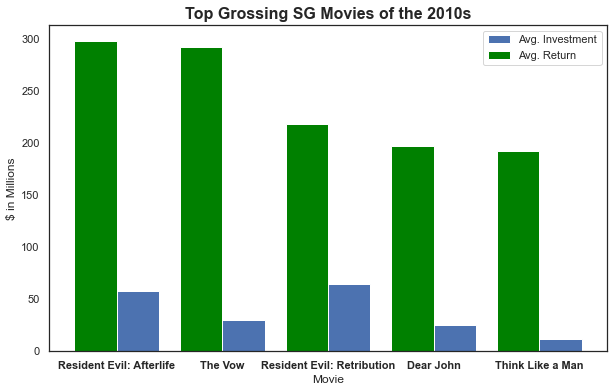

In [349]:
fig,ax=plt.subplots(figsize=(10,6))

X = list(sgem['title'].values)
Y = sgem['production_budget']
Z = sgem['total_margin_$']
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis + 0.2, Y, 0.4, label = 'Avg. Investment')
plt.bar(X_axis - 0.2, Z, 0.4, label = 'Avg. Return',color='green')


plt.xticks(X_axis, X)
plt.xticks(rotation = 0,fontweight='bold')
plt.xlabel("Movie")
plt.ylabel("$ in Millions")
plt.title("Top Grossing SG Movies of the 2010s",fontsize=16,fontweight='bold')
plt.legend()
plt.show()

In [350]:
sgm

,title,studio,year,clean_title_2,clean_title_3,year_title,movie_id,primary_title,original_title,genres,...,averagerating,numvotes,total_weight,Genre_1,Genre_2,Genre_3,clean_title,is_international,is_horror,clean_title_new
0,Toy Story 3,BV,2010,20102010toysto,toystory,2010toystory,tt0435761,Toy Story 3,Toy Story 3,"Adventure,Animation,Comedy",...,8.3,682218.0,5662409.4,Adventure,Animation,Comedy,toystory3,True,False,toystory
1,Alice in Wonderland (2010),BV,2010,20102010alicei,aliceinwonderland,2010aliceinwonderland,tt1014759,Alice in Wonderland,Alice in Wonderland,"Adventure,Family,Fantasy",...,6.5,358813.0,2332284.5,Adventure,Family,Fantasy,aliceinwonderland,True,False,aliceinwonderland
2,Alice in Wonderland (2010),BV,2010,20102010alicei,aliceinwonderland,2010aliceinwonderland,tt2049386,Alice in Wonderland,Alice in Wonderland,"Fantasy,Musical",...,6.5,6.0,39.0,Fantasy,Musical,N/A,aliceinwonderland,False,False,aliceinwonderland
3,Harry Potter and the Deathly Hallows Part 1,WB,2010,20102010harryp,harrypotterandthedeathlyhallowspart,2010harrypotterandthedeathlyhallowspart,tt0926084,Harry Potter and the Deathly Hallows: Part 1,Harry Potter and the Deathly Hallows: Part 1,"Adventure,Fantasy,Mystery",...,7.7,425530.0,3276581.0,Adventure,Fantasy,Mystery,harrypotterandthedeathlyhallowspart1,True,False,harrypotterandthedeathlyhallowspart
4,Inception,WB,2010,20102010incept,inception,2010inception,tt1375666,Inception,Inception,"Action,Adventure,Sci-Fi",...,8.8,1841066.0,16201380.8,Action,Adventure,Sci-Fi,inception,True,False,inception
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3340,Helicopter Eela,Eros,2018,20182018helico,helicoptereela,2018helicoptereela,tt8427036,Helicopter Eela,Helicopter Eela,Drama,...,5.4,673.0,3634.2,Drama,N/A,N/A,helicoptereela,False,False,helicoptereela
3348,Oolong Courtyard,CL,2018,20182018oolong,oolongcourtyard,2018oolongcourtyard,tt8549902,Oolong Courtyard: KungFu School,Oolong Courtyard,Comedy,...,4.6,61.0,280.6,Comedy,N/A,N/A,oolongcourtyard,True,False,oolongcourtyard
3353,Elliot: The Littlest Reindeer,Scre.,2018,20182018elliot,elliotthelittlestreindeer,2018elliotthelittlestreindeer,tt4177856,Elliot the Littlest Reindeer,Elliot the Littlest Reindeer,"Animation,Family",...,5.1,281.0,1433.1,Animation,Family,N/A,elliotthelittlestreindeer,False,False,elliotthelittlestreindeer
3370,El Pacto,Sony,2018,20182018elpact,elpacto,2018elpacto,tt7690762,The Pact,El pacto,"Horror,Thriller",...,5.3,750.0,3975.0,Horror,Thriller,N/A,elpacto,False,True,elpacto


In [351]:
final_sgm = pd.DataFrame(studio_movies.merge(movies_agg,how='left',left_on='year_title',right_on='year_title'))

In [358]:
sgm = pd.DataFrame(sgm[sgm['studio'] == 'SGem'])

In [360]:
sgm['Genre_2'].fillna(0,inplace=True)

In [361]:
sgm['Genre_3'].fillna(0,inplace=True)

In [365]:
sgm['Genre_3'].value_counts() 

N/A         12
Thriller     7
Horror       7
Sci-Fi       2
Drama        2
Romance      1
Musical      1
War          1
Fantasy      1
Name: Genre_3, dtype: int64

In [368]:
sgm['Genre_1'].value_counts()

Action    12
Drama      9
Comedy     7
Horror     3
Crime      3
Name: Genre_1, dtype: int64

In [369]:
sgm['Genre_2'].value_counts()

Romance      6
Mystery      4
Drama        4
Music        3
Fantasy      3
Crime        3
N/A          3
Horror       3
Adventure    2
Comedy       2
Thriller     1
Name: Genre_2, dtype: int64

In [370]:
sgm['Genre_1'].value_counts()

Action    12
Drama      9
Comedy     7
Horror     3
Crime      3
Name: Genre_1, dtype: int64

In [373]:
horror_studios['studio'].value_counts()

Uni.        23
SGem        13
LGF         10
WB (NL)      9
Fox          9
Par.         9
IFC          5
WB           5
Magn.        4
Sony         4
A24          4
W/Dim.       3
Rela.        3
BH Tilt      3
STX          3
Over.        2
TriS         2
Focus        2
BG           2
RAtt.        2
BV           2
LG/S         2
Triu         1
MNE          1
Sum.         1
Eros         1
MBox         1
PH           1
FM           1
RLJ          1
KL           1
Orch.        1
SMod         1
CBS          1
Imag.        1
Anch.        1
Amazon       1
BST          1
CE           1
Cdgm.        1
FoxS         1
KE           1
EOne         1
SPC          1
Electric     1
Name: studio, dtype: int64

In [383]:
movie_budget[movie_budget['release_year'] >= 2000].count()

id                   4387
release_date         4387
movie                4387
production_budget    4387
domestic_gross       4387
worldwide_gross      4387
total_gross          4387
total_margin_$       4387
total_margin_%       4387
domestic_margin_$    4387
domestic_margin_%    4387
clean_title          4387
release_year         4387
year_title           4387
dtype: int64

In [ ]:
genre